In [1]:
# Importing relevant libraries for the data cleaning and exploration process

import pandas as pd
import matplotlib as mt
import numpy as np
import matplotlib.pyplot as plt    # always important for plots
import seaborn as sns
import pylab
import datetime as dt
import matplotlib.patches as mpatches
import math as m
%matplotlib inline

import statsmodels.api as sms
from statsmodels.stats import diagnostic as diag

In [2]:
# Setting style

plt.style.use('ggplot')

In [3]:
pd.set_option('mode.chained_assignment',None)

# Light Data Exploration

In [4]:
# Creating a table based on the CSV file "all_seasons -NBA".

NBA = pd.read_csv('all_seasons -NBA.csv')
NBA.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [5]:
# Checking the columns' data types.

NBA.dtypes 

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [6]:
NBA.shape

(11145, 22)

In [7]:
NBA.shape

(11145, 22)

In [8]:
# Table descriptive analysis based on numerical columns.

NBA.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


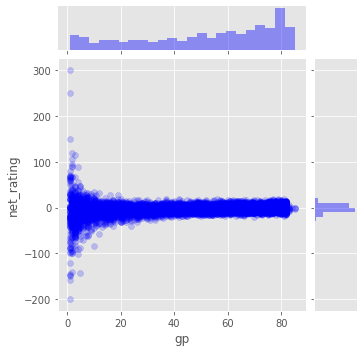

In [9]:
# There are extreme values for players who played less than about 10 games in a season.

sns.jointplot(x='gp',y='net_rating',data=NBA,color='b',alpha=0.2,height=5)

In [10]:
print('10th percentile games played')
print('---------------')
print(NBA.gp.quantile(0.1))

tenth_percentile_gp = NBA.gp.quantile(0.1)

10th percentile games played
---------------
11.0


In [11]:
# Check the 10 highest net ratings for players who played at least 7 games during a given season to find outliers.

'''
It appears that players with high Net Rating values did not play as many games 
(data is not available on the minutes played). Probably this is because they played fewer minutes
per game so their Net Rating values showed greater fluctuations.
'''

NBA[NBA['gp']>tenth_percentile_gp].sort_values('net_rating',ascending=False).head(10)[['player_name','team_abbreviation','season','gp','net_rating','draft_year']]

,player_name,team_abbreviation,season,gp,net_rating,draft_year
7314,Malcolm Thomas,CHI,2012-13,12,32.5,Undrafted
1023,Andrew Gaze,SAS,1998-99,19,27.4,Undrafted
9468,Chris McCullough,WAS,2016-17,16,26.8,2015
7649,Shavlik Randolph,PHX,2013-14,14,21.2,Undrafted
5393,Hamed Haddadi,MEM,2008-09,19,19.7,Undrafted
7892,James Jones,MIA,2013-14,20,19.5,2003
9039,Draymond Green,GSW,2015-16,81,18.9,2012
8780,KJ McDaniels,HOU,2015-16,37,18.9,2014
6924,Jimmy Butler,CHI,2011-12,42,18.8,2011
9259,JaVale McGee,GSW,2016-17,77,18.7,2008


In [12]:
# Looking for outliers by checking the lowest 10 net rating for players who played at least 7 games at the season

'''
It appears that players with lowest Net Rating values did not play as many games 
(data is not available on the minutes played). Probably this is because they played fewer minutes
per game so their Net Rating values showed greater fluctuations.
'''

NBA[NBA['gp']>tenth_percentile_gp].sort_values('net_rating',ascending=True).head(10)[['player_name','team_abbreviation','season','gp','net_rating','draft_year']]

,player_name,team_abbreviation,season,gp,net_rating,draft_year
8647,Luis Montero,POR,2015-16,12,-58.0,Undrafted
4460,Eddie Griffin,MIN,2006-07,13,-42.8,2001
7453,Kevin Murphy,UTA,2012-13,17,-40.9,2012
7945,Erik Murphy,CHI,2013-14,24,-40.0,2013
6688,Eddy Curry,MIA,2011-12,14,-38.0,2001
10437,Wade Baldwin IV,POR,2018-19,16,-36.8,2016
7394,Joel Przybilla,MIL,2012-13,12,-36.3,2000
9162,Kyle Wiltjer,HOU,2016-17,14,-35.9,Undrafted
2182,Sean Colson,HOU,2000-01,13,-35.2,Undrafted
3791,DJ Mbenga,DAL,2004-05,15,-34.4,Undrafted


# Data Cleaning And Preperation

In [13]:
# Dropping duplicated values.

NBA= NBA.drop_duplicates()

In [14]:
# Due to incomplete data, season 2019-2020 was dropped.

NBA.drop(NBA.loc[NBA['season']=='2019-20'].index, inplace=True)

NBA['season'].unique()

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19'],
      dtype=object)

In [15]:
# Rows containing player information from fewer than eleven games during the season were excluded.

NBA= NBA[NBA['gp']>tenth_percentile_gp]  
print('Min games palayed in a season: ',NBA['gp'].min())

Min games palayed in a season:  12


In [16]:
NBA.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [17]:
'''
Removing columns that are not relevant to the analysis - such as draft round as already exists the draft
number the player was drafted at.
'''

NBA.drop(columns=['Unnamed: 0','draft_round'],axis=1,inplace=True)

NBA.head(2)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36,198.12,99.79024,Southeastern Oklahoma State,USA,1986,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28,215.90,117.93392,Florida,USA,1990,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97


In [18]:
# Ensure there are no missing values in the column of the table.

count=0

for col in NBA.columns:
    pct_missing = np.mean(NBA[col].isnull())
    if pct_missing>0:
        print('{} - {}%'.format(col, round(pct_missing*100)))
        count+=1
        
if count==0:
    print('There are no missing values in the data frame')

There are no missing values in the data frame


In [19]:
'''
The rows with a draft year of NULL or 'Undrafted' have been removed because the multiple linear regression model
will only check the players that were drafted to prevent extreme results and to examine the effect of the draft
pick number on the Net Rating.
'''

NBA.drop(NBA.loc[NBA['draft_year']=='Undrafted'].index, inplace=True)
NBA.drop(NBA.loc[NBA['draft_year'].isnull()].index, inplace=True)

NBA.drop(NBA.loc[NBA['draft_number']=='Undrafted'].index, inplace=True)
NBA.drop(NBA.loc[NBA['draft_number'].isnull()].index, inplace=True)

In [20]:
# Making sure there are no NULL values in draft_year or draft_number or rows with 'Undrafted' values left

print('Number of NULL or "Undrafted" values in draft_year and draft_number rows: ',NBA[(NBA['draft_year']=='Undrafted')&(NBA['draft_year'].isnull())]['draft_year'].count())

Number of NULL or "Undrafted" values in draft_year and draft_number rows:  0


In [21]:
# Adding capital letters to the column names

NBA.columns = [x.title() for x in NBA.columns]
NBA.head(2)

,Player_Name,Team_Abbreviation,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,Reb,Ast,Net_Rating,Oreb_Pct,Dreb_Pct,Usg_Pct,Ts_Pct,Ast_Pct,Season
0,Dennis Rodman,CHI,36,198.12,99.79024,Southeastern Oklahoma State,USA,1986,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28,215.90,117.93392,Florida,USA,1990,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97


In [22]:
# There are now 8,529 rows and 19 columns in the table.

print('Number of rows and columns in the table')
print('-'*100)
print(NBA.shape)

Number of rows and columns in the table
----------------------------------------------------------------------------------------------------
(8185, 20)


# Extracting Transforming Loading (ETL) Process

In [23]:
print('Number of teams between 1996-1997 season to 2019-2020 season:',
      NBA['Team_Abbreviation'].nunique())

print('Number of teams played in 2019-2020 season:                  ',
      NBA[NBA['Season']=='2019-20']['Team_Abbreviation'].nunique())

Number of teams between 1996-1997 season to 2019-2020 season: 36
Number of teams played in 2019-2020 season:                   0


In [24]:
'''
I loaded a table of NBA's season 2019-2020 Team Abbreviations and teams names
in order to adding a column with the team name to the NBA table
'''

NBA_teams_names = pd.read_html('https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations')

NBA_teams_names=NBA_teams_names[0][1:]
NBA_teams_names

,0,1
1,ATL,Atlanta Hawks
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Hornets
5,CHI,Chicago Bulls
6,CLE,Cleveland Cavaliers
7,DAL,Dallas Mavericks
8,DEN,Denver Nuggets
9,DET,Detroit Pistons
10,GSW,Golden State Warriors


In [25]:
# Creating a list of team names and their abbreviations in order to build a dictionary.

team_name=[]
team_ab=[]

NBA_teams_names[1].apply(lambda TeamName: team_name.append(TeamName))

NBA_teams_names[0].apply(lambda TeamAb: team_ab.append(TeamAb))

1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
Name: 0, dtype: object

In [26]:
'''
Creating a dictionary of team names based on team abbreviations,
so I could add a column to the NBA table with the teams' names.
'''

dictionary_team_name = dict(zip(team_ab, team_name))
dictionary_team_name

{'ATL': 'Atlanta Hawks',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NOP': 'New Orleans Pelicans',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spurs',
 'TOR': 'Toronto Raptors',
 'UTA': 'Utah Jazz',
 'WAS': 'Washington Wizards'}

In [27]:
# Adding the column Team_Name by the dictionary_team_name to the NBA table.

NBA['Team_Name']=NBA['Team_Abbreviation'].map(dictionary_team_name)
NBA[['Team_Abbreviation','Team_Name']]

,Team_Abbreviation,Team_Name
0,CHI,Chicago Bulls
1,LAC,Los Angeles Clippers
3,DAL,Dallas Mavericks
4,MIA,Miami Heat
5,HOU,Houston Rockets
...,...,...
10625,BOS,Boston Celtics
10626,OKC,Oklahoma City Thunder
10627,IND,Indiana Pacers
10628,ORL,Orlando Magic


In [28]:
'''
Checking which teams that exist in the NBA_new dataset did not play
in 2019-2020 season and therefore the Team_Name has a NULL value.
'''

print("Teams' abbreviations of teams that exist in the data set but did not participate in season 2019-2020:")
print('-'*100)
print(NBA[NBA['Team_Name'].isnull()]['Team_Abbreviation'].unique())

Teams' abbreviations of teams that exist in the data set but did not participate in season 2019-2020:
----------------------------------------------------------------------------------------------------
['VAN' 'NJN' 'SEA' 'CHH' 'NOH' 'NOK']


In [29]:
'''
Adding the names of teams that did not play in the 2019-2020 season and had played after season 1996-1997.
'''

dictionary_team_name2 = {'SEA': 'Seattle SuperSonics',
 'VAN': 'Vancouver Grizzlies',
 'NJN': 'New Jersey Nets',
 'CHH': 'Charlotte Hornets',
 'NOH': 'New Orleans Hornets',
 'NOK': 'New Orleans Oklahoma'}

In [30]:
'''
Updating dictionary_team_name so will include also teams that did not 
participate in the league in 2019-2020
'''

dictionary_team_name.update(dictionary_team_name2)
dictionary_team_name

{'ATL': 'Atlanta Hawks',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NOP': 'New Orleans Pelicans',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spurs',
 'TOR': 'Toronto Raptors',
 'UTA': 'Utah Jazz',
 'WAS': 'Washington Wizards',
 'SEA': 'Seattle SuperSonics',
 'VAN': 'Vancouver Grizzlies',
 'NJN': 'New Jersey Nets',
 'CHH': 'Charlotte Hornets',
 'NOH': 'New Orleans Hornets',
 'NOK': '

In [31]:
'''
Updating Team_Name column to include also names of teams that did not play in 2019-2020 but did play after or in 1996-1997.
'''

NBA['Team_Name']=NBA['Team_Abbreviation'].map(dictionary_team_name)
NBA[['Team_Abbreviation','Team_Name']]

,Team_Abbreviation,Team_Name
0,CHI,Chicago Bulls
1,LAC,Los Angeles Clippers
3,DAL,Dallas Mavericks
4,MIA,Miami Heat
5,HOU,Houston Rockets
...,...,...
10625,BOS,Boston Celtics
10626,OKC,Oklahoma City Thunder
10627,IND,Indiana Pacers
10628,ORL,Orlando Magic


In [32]:
# Load a website page that contains teams by conference (east or west) who played in the 2019-2020 season.

nba_last=pd.read_html('https://www.basketball-reference.com/leagues/NBA_2020.html')

In [33]:
# Load the eastern conference table.
nba_last_east=nba_last[0]

# Load the western conference table.
nba_last_west=nba_last[1]
nba_last_west

,Western Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Los Angeles Lakers*,52,19,0.732,—,113.4,107.6,6.28
1,Los Angeles Clippers*,49,23,0.681,3.5,116.3,109.9,6.66
2,Denver Nuggets*,46,27,0.630,7.0,111.3,109.2,2.35
3,Houston Rockets*,44,28,0.611,8.5,117.8,114.8,3.13
4,Oklahoma City Thunder*,44,28,0.611,8.5,110.4,108.4,2.33
5,Utah Jazz*,44,28,0.611,8.5,111.3,108.8,2.52
6,Dallas Mavericks*,43,32,0.573,11.0,117.0,112.1,4.87
7,Portland Trail Blazers*,35,39,0.473,18.5,115.0,116.1,-0.61
8,Memphis Grizzlies,34,39,0.466,19.0,112.6,113.7,-0.91
9,Phoenix Suns,34,39,0.466,19.0,113.6,113.4,0.56


In [34]:
# Extracting the teams' names from the table and adding them to lists called east and west.

nba_teams_west_conference = nba_last_west['Western Conference'].str.split('*',n=1)
nba_teams_west_conference = nba_teams_west_conference.str.get(0)

nba_teams_east_conference = nba_last_east['Eastern Conference'].str.split('*',n=1)
nba_teams_east_conference = nba_teams_east_conference.str.get(0)

west=[]
for team in nba_teams_west_conference:
    west.append('West')
    

east=[]
for team in nba_teams_east_conference:
    east.append('East')

In [35]:
# Creating a dictionary of east conference teams.

dictionary_east_conference= dict(zip(nba_teams_east_conference,east))
dictionary_east_conference

{'Milwaukee Bucks': 'East',
 'Toronto Raptors': 'East',
 'Boston Celtics': 'East',
 'Indiana Pacers': 'East',
 'Miami Heat': 'East',
 'Philadelphia 76ers': 'East',
 'Brooklyn Nets': 'East',
 'Orlando Magic': 'East',
 'Charlotte Hornets': 'East',
 'Washington Wizards': 'East',
 'Chicago Bulls': 'East',
 'New York Knicks': 'East',
 'Detroit Pistons': 'East',
 'Atlanta Hawks': 'East',
 'Cleveland Cavaliers': 'East'}

In [36]:
# Creating a dictionary of west conference teams.

dictionary_west_conference= dict(zip(nba_teams_west_conference,west))
dictionary_west_conference

{'Los Angeles Lakers': 'West',
 'Los Angeles Clippers': 'West',
 'Denver Nuggets': 'West',
 'Houston Rockets': 'West',
 'Oklahoma City Thunder': 'West',
 'Utah Jazz': 'West',
 'Dallas Mavericks': 'West',
 'Portland Trail Blazers': 'West',
 'Memphis Grizzlies': 'West',
 'Phoenix Suns': 'West',
 'San Antonio Spurs': 'West',
 'Sacramento Kings': 'West',
 'New Orleans Pelicans': 'West',
 'Minnesota Timberwolves': 'West',
 'Golden State Warriors': 'West'}

In [37]:
# Combined the east and west conferences' dictionaries 

dictionary_east_conference.update(dictionary_west_conference)

In [38]:
# Based on dictionary data, adding a Conference column to NBA table.

NBA['Conference']=NBA['Team_Name'].map(dictionary_east_conference)
NBA[['Team_Name','Conference']].head(5)

,Team_Name,Conference
0,Chicago Bulls,East
1,Los Angeles Clippers,West
3,Dallas Mavericks,West
4,Miami Heat,East
5,Houston Rockets,West


In [39]:
# Making sure the values in Conference column are of the right type

type(NBA['Conference'].iloc[255])

str

In [40]:
# Checking which teams did not participate in 2019-2020 season and do not have a conference value.
# CHECK HERE

teams_missing_conference = NBA[NBA['Conference']=='nan']['Team_Name'].unique()
print('Those teams that have no conference value:')
print('---------------------------------------')
print()

for team in teams_missing_conference:
    print(team,end=' | ')

Those teams that have no conference value:
---------------------------------------



In [41]:
# Creating a dictionary of the teams that did not play in the 2019-2020 season

dictionary_conference_missing_teams= {'Seattle SuperSonics': 'East','New Jersey Nets':'East',
                                      'Vancouver Grizzlies':'West','New Orleans Hornets': 'West',
                                      'New Orleans Oklahoma': 'West'}

In [42]:
# Updating the dictionary with teams that did not play in the season 2019-2020.

dictionary_east_conference.update(dictionary_conference_missing_teams)

NBA['Conference']=NBA['Team_Name'].map(dictionary_east_conference)
NBA[['Team_Name','Conference']].head()

,Team_Name,Conference
0,Chicago Bulls,East
1,Los Angeles Clippers,West
3,Dallas Mavericks,West
4,Miami Heat,East
5,Houston Rockets,West


In [43]:
# Loading tables from landofbasketball.com website which contain the teams regular season ranking by each season.

# NBA ranking_1996_1997
ranking_1996_1997= pd.read_html('https://www.landofbasketball.com/yearbyyear/1996_1997_standings.htm')

# NBA ranking_1997_1998
ranking_1997_1998= pd.read_html('https://www.landofbasketball.com/yearbyyear/1997_1998_standings.htm')

# NBA ranking_1998_1999
ranking_1998_1999= pd.read_html('https://www.landofbasketball.com/yearbyyear/1998_1999_standings.htm')

# NBA ranking_1999_2000
ranking_1999_2000= pd.read_html('https://www.landofbasketball.com/yearbyyear/1999_2000_standings.htm')

# NBA ranking_2000_2001
ranking_2000_2001= pd.read_html('https://www.landofbasketball.com/yearbyyear/2000_2001_standings.htm')

# NBA ranking_2001_2002
ranking_2001_2002= pd.read_html('https://www.landofbasketball.com/yearbyyear/2001_2002_standings.htm')

# NBA ranking_2002_2003
ranking_2002_2003= pd.read_html('https://www.landofbasketball.com/yearbyyear/2002_2003_standings.htm')

# NBA ranking_2003_2004
ranking_2003_2004= pd.read_html('https://www.landofbasketball.com/yearbyyear/2003_2004_standings.htm')

# NBA ranking_2004_2005
ranking_2004_2005= pd.read_html('https://www.landofbasketball.com/yearbyyear/2004_2005_standings.htm')

# NBA ranking_2005_2006
ranking_2005_2006= pd.read_html('https://www.landofbasketball.com/yearbyyear/2005_2006_standings.htm')

# NBA ranking_2006_2007
ranking_2006_2007= pd.read_html('https://www.landofbasketball.com/yearbyyear/2006_2007_standings.htm')

# NBA ranking_2007_2008
ranking_2007_2008= pd.read_html('https://www.landofbasketball.com/yearbyyear/2007_2008_standings.htm')

# NBA ranking_2008_2009
ranking_2008_2009= pd.read_html('https://www.landofbasketball.com/yearbyyear/2008_2009_standings.htm')

# NBA ranking_2009_2010
ranking_2009_2010= pd.read_html('https://www.landofbasketball.com/yearbyyear/2009_2010_standings.htm')

# NBA ranking_2010_2011
ranking_2010_2011= pd.read_html('https://www.landofbasketball.com/yearbyyear/2010_2011_standings.htm')

# NBA ranking_2011_2012
ranking_2011_2012= pd.read_html('https://www.landofbasketball.com/yearbyyear/2011_2012_standings.htm')

# NBA ranking_2012_2013
ranking_2012_2013= pd.read_html('https://www.landofbasketball.com/yearbyyear/2012_2013_standings.htm')

# NBA ranking_2013_2014
ranking_2013_2014= pd.read_html('https://www.landofbasketball.com/yearbyyear/2013_2014_standings.htm')

# NBA ranking_2014_2015
ranking_2014_2015= pd.read_html('https://www.landofbasketball.com/yearbyyear/2014_2015_standings.htm')

# NBA ranking_2015_2016
ranking_2015_2016= pd.read_html('https://www.landofbasketball.com/yearbyyear/2015_2016_standings.htm')

# NBA ranking_2016_2017
ranking_2016_2017= pd.read_html('https://www.landofbasketball.com/yearbyyear/2016_2017_standings.htm')

# NBA ranking_2017_2018
ranking_2017_2018= pd.read_html('https://www.landofbasketball.com/yearbyyear/2017_2018_standings.htm')

# NBA ranking_2018_2019
ranking_2018_2019= pd.read_html('https://www.landofbasketball.com/yearbyyear/2018_2019_standings.htm')

# NBA ranking_2019_2020
ranking_2019_2020= pd.read_html('https://www.landofbasketball.com/yearbyyear/2019_2020_standings.htm')

In [44]:
# Here is an example of how the tables I loaded look.

ranking_1996_1997_west=ranking_1996_1997[0][1:]
ranking_1996_1997_west

,0,1,2,3,4,5,6
1,1.0,Utah Jazz,64,18,.780,-,x
2,2.0,Seattle Supersonics,57,25,.695,7.0,x
3,3.0,Houston Rockets,57,25,.695,7.0,x
4,4.0,Los Angeles Lakers,56,26,.683,8.0,x
5,5.0,Portland Trail Blazers,49,33,.598,15.0,x
6,6.0,Minnesota Timberwolves,40,42,.488,24.0,x
7,7.0,Phoenix Suns,40,42,.488,24.0,x
8,8.0,Los Angeles Clippers,36,46,.439,28.0,x
9,9.0,Sacramento Kings,34,48,.415,30.0,NaN
10,10.0,Golden State Warriors,30,52,.366,34.0,NaN


In [45]:
# NBA ranking in the west conference in season 1996_1997

ranking_1996_1997_west=ranking_1996_1997[0][1:]
ranking_1996_1997_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1996_1997_west['Season']='1996-97'
ranking_1996_1997_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)
ranking_1996_1997_west

,Rank,Team_Name,Season
1,1.0,Utah Jazz,1996-97
2,2.0,Seattle Supersonics,1996-97
3,3.0,Houston Rockets,1996-97
4,4.0,Los Angeles Lakers,1996-97
5,5.0,Portland Trail Blazers,1996-97
6,6.0,Minnesota Timberwolves,1996-97
7,7.0,Phoenix Suns,1996-97
8,8.0,Los Angeles Clippers,1996-97
9,9.0,Sacramento Kings,1996-97
10,10.0,Golden State Warriors,1996-97


In [46]:
# NBA ranking in the east conference in season 1996_1997

ranking_1996_1997_east=ranking_1996_1997[1][1:]
ranking_1996_1997_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1996_1997_east['Season']='1996-97'
ranking_1996_1997_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [47]:
# NBA ranking in the west conference in season 1997_1998

ranking_1997_1998_west=ranking_1997_1998[0][1:]
ranking_1997_1998_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1997_1998_west['Season']='1997-98'
ranking_1997_1998_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [48]:
# NBA ranking in the east conference in season 1997_1998

ranking_1997_1998_east=ranking_1997_1998[1][1:]
ranking_1997_1998_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1997_1998_east['Season']='1997-98'
ranking_1997_1998_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [49]:
# NBA ranking in the west conference in season 1998_1999

ranking_1998_1999_west=ranking_1998_1999[0][1:]
ranking_1998_1999_west.drop(columns=[2,3,4,5,6],axis=1,inplace=True)
ranking_1998_1999_west['Season']='1998-99'
ranking_1998_1999_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)
ranking_1998_1999_west

,Rank,Team_Name,Season
1,1.0,San Antonio Spurs,1998-99
2,2.0,Utah Jazz,1998-99
3,3.0,Portland Trail Blazers,1998-99
4,4.0,Houston Rockets,1998-99
5,5.0,Los Angeles Lakers,1998-99
6,6.0,Phoenix Suns,1998-99
7,7.0,Sacramento Kings,1998-99
8,8.0,Minnesota Timberwolves,1998-99
9,9.0,Seattle Supersonics,1998-99
10,10.0,Golden State Warriors,1998-99


In [50]:
# NBA ranking in the east conference in season 1998_1999

ranking_1998_1999_east=ranking_1998_1999[1][1:]
ranking_1998_1999_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1998_1999_east['Season']='1998-99'
ranking_1998_1999_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [51]:
# NBA ranking in the west conference in season 1999_2000

ranking_1999_2000_west=ranking_1999_2000[0][1:]
ranking_1999_2000_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1999_2000_west['Season']='1999-00'
ranking_1999_2000_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [52]:
# NBA ranking in the east conference in season 1999_2000

ranking_1999_2000_east=ranking_1999_2000[1][1:]
ranking_1999_2000_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_1999_2000_east['Season']='1999-00'
ranking_1999_2000_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [53]:
# NBA ranking in the west conference in season 2000_2001

ranking_2000_2001_west=ranking_2000_2001[0][1:]
ranking_2000_2001_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2000_2001_west['Season']='2000-01'
ranking_2000_2001_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [54]:
# NBA ranking in the east conference in season 2000_2001

ranking_2000_2001_east=ranking_2000_2001[1][1:]
ranking_2000_2001_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2000_2001_east['Season']='2000-01'
ranking_2000_2001_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [55]:
# NBA ranking in the west conference in season 2001_2002

ranking_2001_2002_west=ranking_2001_2002[0][1:]
ranking_2001_2002_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2001_2002_west['Season']='2001-02'
ranking_2001_2002_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [56]:
# NBA ranking in the east conference in season 2001_2002

ranking_2001_2002_east=ranking_2001_2002[1][1:]
ranking_2001_2002_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2001_2002_east['Season']='2001-02'
ranking_2001_2002_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [57]:
# NBA ranking in the west conference in season 2002_2003

ranking_2002_2003_west=ranking_2002_2003[0][1:]
ranking_2002_2003_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2002_2003_west['Season']='2002-03'
ranking_2002_2003_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [58]:
# NBA ranking in the east conference in season 2002_2003

ranking_2002_2003_east=ranking_2002_2003[1][1:]
ranking_2002_2003_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2002_2003_east['Season']='2002-03'
ranking_2002_2003_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)
ranking_2002_2003_east

,Rank,Team_Name,Season
1,1.0,Detroit Pistons,2002-03
2,2.0,New Jersey Nets,2002-03
3,3.0,Indiana Pacers,2002-03
4,4.0,Philadelphia 76ers,2002-03
5,5.0,New Orleans Hornets,2002-03
6,6.0,Boston Celtics,2002-03
7,7.0,Milwaukee Bucks,2002-03
8,8.0,Orlando Magic,2002-03
9,9.0,Washington Wizards,2002-03
10,10.0,New York Knicks,2002-03


In [59]:
# NBA ranking in the west conference in season 2003_2004

ranking_2003_2004_west=ranking_2003_2004[0][1:]
ranking_2003_2004_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2003_2004_west['Season']='2003-04'
ranking_2003_2004_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [60]:
# NBA ranking in the east conference in season 2003_2004

ranking_2003_2004_east=ranking_2003_2004[1][1:]
ranking_2003_2004_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2003_2004_east['Season']='2003-04'
ranking_2003_2004_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [61]:
# NBA ranking in the west conference in season 2004_2005

ranking_2004_2005_west=ranking_2004_2005[0][1:]
ranking_2004_2005_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2004_2005_west['Season']='2004-05'
ranking_2004_2005_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [62]:
# NBA ranking in the east conference in season 2004_2005

ranking_2004_2005_east=ranking_2004_2005[1][1:]
ranking_2004_2005_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2004_2005_east['Season']='2004-05'
ranking_2004_2005_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [63]:
# NBA ranking in the west conference in season 2005_2006

ranking_2005_2006_west=ranking_2005_2006[0][1:]
ranking_2005_2006_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2005_2006_west['Season']='2005-06'
ranking_2005_2006_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [64]:
# NBA ranking in the east conference in season 2005_2006

ranking_2005_2006_east=ranking_2005_2006[1][1:]
ranking_2005_2006_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2005_2006_east['Season']='2005-06'
ranking_2005_2006_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [65]:
# NBA ranking in the west conference in season 2006_2007

ranking_2006_2007_west=ranking_2006_2007[0][1:]
ranking_2006_2007_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2006_2007_west['Season']='2006-07'
ranking_2006_2007_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [66]:
# NBA ranking in the east conference in season 2006_2007

ranking_2006_2007_east=ranking_2006_2007[1][1:]
ranking_2006_2007_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2006_2007_east['Season']='2006-07'
ranking_2006_2007_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [67]:
# NBA ranking in the west conference in season 2007_2008

ranking_2007_2008_west=ranking_2007_2008[0][1:]
ranking_2007_2008_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2007_2008_west['Season']='2007-08'
ranking_2007_2008_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [68]:
# NBA ranking in the east conference in season 2007_2008

ranking_2007_2008_east=ranking_2007_2008[1][1:]
ranking_2007_2008_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2007_2008_east['Season']='2007-08'
ranking_2007_2008_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [69]:
# NBA ranking in the west conference in season 2008_2009

ranking_2008_2009_west=ranking_2008_2009[0][1:]
ranking_2008_2009_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2008_2009_west['Season']='2008-09'
ranking_2008_2009_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)
ranking_2008_2009_west

,Rank,Team_Name,Season
1,1.0,Los Angeles Lakers,2008-09
2,2.0,Denver Nuggets,2008-09
3,3.0,San Antonio Spurs,2008-09
4,4.0,Portland Trail Blazers,2008-09
5,5.0,Houston Rockets,2008-09
6,6.0,Dallas Mavericks,2008-09
7,7.0,New Orleans Hornets,2008-09
8,8.0,Utah Jazz,2008-09
9,9.0,Phoenix Suns,2008-09
10,10.0,Golden State Warriors,2008-09


In [70]:
# NBA ranking in the east conference in season 2008_2009

ranking_2008_2009_east=ranking_2008_2009[1][1:]
ranking_2008_2009_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2008_2009_east['Season']='2008-09'
ranking_2008_2009_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [71]:
# NBA ranking in the west conference in season 2009_2010

ranking_2009_2010_west=ranking_2009_2010[0][1:]
ranking_2009_2010_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2009_2010_west['Season']='2009-10'
ranking_2009_2010_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [72]:
# NBA ranking in the east conference in season 2009_2010

ranking_2009_2010_east=ranking_2009_2010[1][1:]
ranking_2009_2010_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2009_2010_east['Season']='2009-10'
ranking_2009_2010_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [73]:
# NBA ranking in the west conference in season 2010_2011

ranking_2010_2011_west=ranking_2010_2011[0][1:]
ranking_2010_2011_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2010_2011_west['Season']='2010-11'
ranking_2010_2011_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [74]:
# NBA ranking in the east conference in season 2010_2011

ranking_2010_2011_east=ranking_2010_2011[1][1:]
ranking_2010_2011_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2010_2011_east['Season']='2010-11'
ranking_2010_2011_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [75]:
# NBA ranking in the west conference in season 2011_2012

ranking_2011_2012_west=ranking_2011_2012[0][1:]
ranking_2011_2012_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2011_2012_west['Season']='2011-12'
ranking_2011_2012_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [76]:
# NBA ranking in the east conference in season 2011_2012

ranking_2011_2012_east=ranking_2011_2012[1][1:]
ranking_2011_2012_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2011_2012_east['Season']='2011-12'
ranking_2011_2012_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [77]:
# NBA ranking in the west conference in season 2012_2013

ranking_2012_2013_west=ranking_2012_2013[0][1:]
ranking_2012_2013_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2012_2013_west['Season']='2012-13'
ranking_2012_2013_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [78]:
# NBA ranking in the east conference in season 2012_2013

ranking_2012_2013_east=ranking_2012_2013[1][1:]
ranking_2012_2013_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2012_2013_east['Season']='2012-13'
ranking_2012_2013_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [79]:
# NBA ranking in the west conference in season 2013_2014

ranking_2013_2014_west=ranking_2013_2014[0][1:]
ranking_2013_2014_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2013_2014_west['Season']='2013-14'
ranking_2013_2014_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [80]:
# NBA ranking in the east conference in season 2013_2014

ranking_2013_2014_east=ranking_2013_2014[1][1:]
ranking_2013_2014_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2013_2014_east['Season']='2013-14'
ranking_2013_2014_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [81]:
# NBA ranking in the west conference in season 2014_2015

ranking_2014_2015_west=ranking_2014_2015[0][1:]
ranking_2014_2015_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2014_2015_west['Season']='2014-15'
ranking_2014_2015_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [82]:
# NBA ranking in the east conference in season 2014_2015

ranking_2014_2015_east=ranking_2014_2015[1][1:]
ranking_2014_2015_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2014_2015_east['Season']='2014-15'
ranking_2014_2015_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [83]:
# NBA ranking in the west conference in season 2015_2016

ranking_2015_2016_west=ranking_2015_2016[0][1:]
ranking_2015_2016_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2015_2016_west['Season']='2015-16'
ranking_2015_2016_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [84]:
# NBA ranking in the east conference in season 2015_2016

ranking_2015_2016_east=ranking_2015_2016[1][1:]
ranking_2015_2016_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2015_2016_east['Season']='2015-16'
ranking_2015_2016_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [85]:
# NBA ranking in the west conference in season 2016_2017

ranking_2016_2017_west=ranking_2016_2017[0][1:]
ranking_2016_2017_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2016_2017_west['Season']='2016-17'
ranking_2016_2017_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [86]:
# NBA ranking in the east conference in season 2016_2017

ranking_2016_2017_east=ranking_2016_2017[1][1:]
ranking_2016_2017_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2016_2017_east['Season']='2016-17'
ranking_2016_2017_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [87]:
# NBA ranking in the west conference in season 2017_2018

ranking_2017_2018_west=ranking_2017_2018[0][1:]
ranking_2017_2018_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2017_2018_west['Season']='2017-18'
ranking_2017_2018_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [88]:
# NBA ranking in the east conference in season 2017_2018

ranking_2017_2018_east=ranking_2017_2018[1][1:]
ranking_2017_2018_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2017_2018_east['Season']='2017-18'
ranking_2017_2018_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [89]:
# NBA ranking in the west conference in season 2018_2019

ranking_2018_2019_west=ranking_2018_2019[0][1:]
ranking_2018_2019_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2018_2019_west['Season']='2018-19'
ranking_2018_2019_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [90]:
# NBA ranking in the east conference in season 2018_2019

ranking_2018_2019_east=ranking_2018_2019[1][1:]
ranking_2018_2019_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2018_2019_east['Season']='2018-19'
ranking_2018_2019_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [91]:
# NBA ranking in the west conference in season 2019_2020

ranking_2019_2020_west=ranking_2019_2020[0][1:]
ranking_2019_2020_west.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2019_2020_west['Season']='2019-20'
ranking_2019_2020_west.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)

In [92]:
# NBA ranking in the east conference in season 2019_2020

ranking_2019_2020_east=ranking_2019_2020[1][1:]
ranking_2019_2020_east.drop([2,3,4,5,6],axis=1,inplace=True)
ranking_2019_2020_east['Season']='2019-20'
ranking_2019_2020_east.rename(columns={0: 'Rank',1: 'Team_Name'},inplace=True)
ranking_2019_2020_east

,Rank,Team_Name,Season
1,1.0,Milwaukee Bucks,2019-20
2,2.0,Toronto Raptors,2019-20
3,3.0,Boston Celtics,2019-20
4,4.0,Indiana Pacers,2019-20
5,5.0,Miami Heat,2019-20
6,6.0,Philadelphia 76ers,2019-20
7,7.0,Brooklyn Nets,2019-20
8,8.0,Orlando Magic,2019-20
9,9.0,Washington Wizards,2019-20
10,10.0,Charlotte Hornets,2019-20


In [93]:
# Consolidating the east conference team rankings into one table.


ranking_east= pd.concat([ranking_1996_1997_east,ranking_1997_1998_east,ranking_1998_1999_east
          ,ranking_1999_2000_east,ranking_2000_2001_east,ranking_2001_2002_east,
          ranking_2002_2003_east,ranking_2003_2004_east,ranking_2004_2005_east
          ,ranking_2005_2006_east,ranking_2006_2007_east,ranking_2007_2008_east
          ,ranking_2008_2009_east,ranking_2009_2010_east,ranking_2010_2011_east,
           ranking_2011_2012_east,
          ranking_2012_2013_east,ranking_2013_2014_east,ranking_2014_2015_east,
          ranking_2015_2016_east,ranking_2016_2017_east,ranking_2017_2018_east,
          ranking_2018_2019_east,ranking_2019_2020_east],axis=0)

column2 = 'Season Team_Name Rank'

ranking_east = ranking_east.reindex(columns=column2.split())
ranking_east

,Season,Team_Name,Rank
1,1996-97,Chicago Bulls,1.0
2,1996-97,Miami Heat,2.0
3,1996-97,New York Knicks,3.0
4,1996-97,Atlanta Hawks,4.0
5,1996-97,Detroit Pistons,5.0
...,...,...,...
11,2019-20,Chicago Bulls,11.0
12,2019-20,New York Knicks,12.0
13,2019-20,Detroit Pistons,13.0
14,2019-20,Atlanta Hawks,14.0


In [94]:
# Consolidating the west conference team rankings into one table.

ranking_west= pd.concat([ranking_1996_1997_west,ranking_1997_1998_west,ranking_1998_1999_west
          ,ranking_1999_2000_west,ranking_2000_2001_west,ranking_2001_2002_west,
          ranking_2002_2003_west,ranking_2003_2004_west,ranking_2004_2005_west
          ,ranking_2005_2006_west,ranking_2006_2007_west,ranking_2007_2008_west
          ,ranking_2008_2009_west,ranking_2009_2010_west,ranking_2010_2011_west,
           ranking_2011_2012_west,
          ranking_2012_2013_west,ranking_2013_2014_west,ranking_2014_2015_west,
          ranking_2015_2016_west,ranking_2016_2017_west,ranking_2017_2018_west,
          ranking_2018_2019_west,ranking_2019_2020_west],axis=0)

ranking_west = ranking_west.reindex(columns=column2.split())
ranking_west

,Season,Team_Name,Rank
1,1996-97,Utah Jazz,1.0
2,1996-97,Seattle Supersonics,2.0
3,1996-97,Houston Rockets,3.0
4,1996-97,Los Angeles Lakers,4.0
5,1996-97,Portland Trail Blazers,5.0
...,...,...,...
11,2019-20,San Antonio Spurs,11.0
12,2019-20,Sacramento Kings,12.0
13,2019-20,New Orleans Pelicans,13.0
14,2019-20,Minnesota Timberwolves,14.0


In [95]:
# Combining both conferences' team rankings by year into one table.

ranking = pd.concat([ranking_west,ranking_east],axis=0)

ranking

,Season,Team_Name,Rank
1,1996-97,Utah Jazz,1.0
2,1996-97,Seattle Supersonics,2.0
3,1996-97,Houston Rockets,3.0
4,1996-97,Los Angeles Lakers,4.0
5,1996-97,Portland Trail Blazers,5.0
...,...,...,...
11,2019-20,Chicago Bulls,11.0
12,2019-20,New York Knicks,12.0
13,2019-20,Detroit Pistons,13.0
14,2019-20,Atlanta Hawks,14.0


In [96]:
# Merging the teams' rankings by season with the NBA table.

NBA= pd.merge(NBA, ranking, on=['Team_Name', 'Season']) 

NBA.head()

,Player_Name,Team_Abbreviation,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,...,Net_Rating,Oreb_Pct,Dreb_Pct,Usg_Pct,Ts_Pct,Ast_Pct,Season,Team_Name,Conference,Rank
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,...,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Chicago Bulls,East,1.0
1,Dickey Simpkins,CHI,25,205.74,112.490816,Providence,USA,1994,21,48,...,-0.9,0.099,0.151,0.163,0.411,0.112,1996-97,Chicago Bulls,East,1.0
2,Jason Caffey,CHI,24,203.20,116.119552,Alabama,USA,1995,20,75,...,9.0,0.114,0.134,0.184,0.574,0.094,1996-97,Chicago Bulls,East,1.0
3,Bill Wennington,CHI,34,213.36,111.130040,St. John's (NY),USA,1985,16,61,...,7.7,0.068,0.119,0.168,0.538,0.079,1996-97,Chicago Bulls,East,1.0
4,Scottie Pippen,CHI,31,200.66,103.418976,Central Arkansas,USA,1987,5,82,...,13.5,0.059,0.133,0.245,0.554,0.237,1996-97,Chicago Bulls,East,1.0


In [97]:
# Rename the Rank column to Team_Rank_In_Regular_Season.

NBA.rename(columns={'Rank': 'Team_Rank_In_Regular_Season'},inplace=True)
NBA.head()

,Player_Name,Team_Abbreviation,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,...,Net_Rating,Oreb_Pct,Dreb_Pct,Usg_Pct,Ts_Pct,Ast_Pct,Season,Team_Name,Conference,Team_Rank_In_Regular_Season
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,...,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Chicago Bulls,East,1.0
1,Dickey Simpkins,CHI,25,205.74,112.490816,Providence,USA,1994,21,48,...,-0.9,0.099,0.151,0.163,0.411,0.112,1996-97,Chicago Bulls,East,1.0
2,Jason Caffey,CHI,24,203.20,116.119552,Alabama,USA,1995,20,75,...,9.0,0.114,0.134,0.184,0.574,0.094,1996-97,Chicago Bulls,East,1.0
3,Bill Wennington,CHI,34,213.36,111.130040,St. John's (NY),USA,1985,16,61,...,7.7,0.068,0.119,0.168,0.538,0.079,1996-97,Chicago Bulls,East,1.0
4,Scottie Pippen,CHI,31,200.66,103.418976,Central Arkansas,USA,1987,5,82,...,13.5,0.059,0.133,0.245,0.554,0.237,1996-97,Chicago Bulls,East,1.0


In [98]:
'''
A table with the players' positions is loaded from "https://www.kaggle.com/drgilermo/nba-players-stats"
The position column will be added based on that.
'''

'''
It is important to note that the positions table shows the positions of players who started playing
in season  2017-2018 or before.
'''

players_positions=pd.read_csv('player_data.csv')
players_positions.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,10-Jun,240.0,24-Jun-68,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,9-Jun,235.0,7-Apr-46,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2-Jul,225.0,16-Apr-47,"University of California, Los Angeles"
3,Michael Adams,1986,1996,G,10-May,162.0,19-Jan-63,Boston College
4,Steve Bardo,1992,1996,G,5-Jun,190.0,5-Apr-68,University of Illinois at Urbana-Champaign


In [99]:
print('year_end column data type is: ',type(players_positions['year_end'].iloc[0]))

year_end column data type is:  <class 'numpy.int64'>


In [100]:
players_positions.rename(columns={'position': 'Abb_Position','name': 'Player_Name'},inplace=True)

In [101]:
# For the NBA table, only the players who played in the 1996-1997 season or after are relevant, so I drop the rest.

players_positions= players_positions[players_positions['year_end']>1995]

# Making sure there is no data about player positions for players who did not play in 1996-1997 or later.

print('Min Year in the players_positions table is: ',players_positions['year_end'].min())

Min Year in the players_positions table is:  1996


In [102]:
# Dropping irrelevant columns from the players_positions table.

players_positions.drop(columns=['year_start','year_end','height','weight','birth_date','college'],axis=1,inplace=True)

players_positions.columns

Index(['Player_Name', 'Abb_Position'], dtype='object')

In [103]:
'''
Checking the positions in table positions and the number of players in each position
(players may be shown more than once depending on how many seasons they have played in).
'''

players_positions['Abb_Position'].value_counts()

G      744
F      597
C      270
F-C    160
G-F    153
C-F     67
F-G     59
Name: Abb_Position, dtype: int64

In [104]:
# Duplicate values are avoided by replacing some values in the positions column.

players_positions['Abb_Position'].replace({'F-G': 'G-F', 'C-F': 'F-C'},inplace=True)
players_positions['Abb_Position'].value_counts()

G      744
F      597
C      270
F-C    227
G-F    212
Name: Abb_Position, dtype: int64

In [105]:
# Add dictionary from position's abb to position's name

positions_dict = {'G': 'Guard', 'F': 'Foward', 'C': 'Center', 'F-C': 'Foward Center', 'G-F': 'Guard Foward'}

In [106]:
# Adding a column for Position.

players_positions['Position']=players_positions['Abb_Position'].map(positions_dict)

In [107]:
# Dropping column Abb_Position.

players_positions.drop(columns=['Abb_Position'],axis=1,inplace=True)

players_positions

,Player_Name,Position
3,Michael Adams,Guard
4,Steve Bardo,Guard
5,Anthony Bonner,Foward
9,Marques Bragg,Foward
10,Junior Burrough,Foward
...,...,...
4542,Cody Zeller,Foward Center
4543,Tyler Zeller,Foward Center
4544,Paul Zipser,Guard Foward
4545,Ante Zizic,Foward Center


In [108]:
NBA.head()

,Player_Name,Team_Abbreviation,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,...,Net_Rating,Oreb_Pct,Dreb_Pct,Usg_Pct,Ts_Pct,Ast_Pct,Season,Team_Name,Conference,Team_Rank_In_Regular_Season
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,...,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Chicago Bulls,East,1.0
1,Dickey Simpkins,CHI,25,205.74,112.490816,Providence,USA,1994,21,48,...,-0.9,0.099,0.151,0.163,0.411,0.112,1996-97,Chicago Bulls,East,1.0
2,Jason Caffey,CHI,24,203.20,116.119552,Alabama,USA,1995,20,75,...,9.0,0.114,0.134,0.184,0.574,0.094,1996-97,Chicago Bulls,East,1.0
3,Bill Wennington,CHI,34,213.36,111.130040,St. John's (NY),USA,1985,16,61,...,7.7,0.068,0.119,0.168,0.538,0.079,1996-97,Chicago Bulls,East,1.0
4,Scottie Pippen,CHI,31,200.66,103.418976,Central Arkansas,USA,1987,5,82,...,13.5,0.059,0.133,0.245,0.554,0.237,1996-97,Chicago Bulls,East,1.0


In [109]:
# Merging the tables to include only players with positions in the data and creating a new table for it - NBA_new.

'''
Note that the positions table indicates the position of players who began playing in season 2017-2018 or before.
Therefore, the new table NBA_new will include only data on players drafted before or in season 2017-2018.
'''

NBA_new = pd.merge(NBA, players_positions, on='Player_Name',how='inner')
NBA_new.head()

,Player_Name,Team_Abbreviation,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,...,Oreb_Pct,Dreb_Pct,Usg_Pct,Ts_Pct,Ast_Pct,Season,Team_Name,Conference,Team_Rank_In_Regular_Season,Position
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,...,0.186,0.323,0.100,0.479,0.113,1996-97,Chicago Bulls,East,1.0,Foward
1,Dennis Rodman,CHI,37,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,80,...,0.169,0.319,0.088,0.459,0.112,1997-98,Chicago Bulls,East,1.0,Foward
2,Dennis Rodman,LAL,38,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,23,...,0.114,0.348,0.065,0.388,0.063,1998-99,Los Angeles Lakers,West,5.0,Foward
3,Dennis Rodman,DAL,39,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,12,...,0.136,0.351,0.064,0.457,0.046,1999-00,Dallas Mavericks,West,9.0,Foward
4,Dickey Simpkins,CHI,25,205.74,112.490816,Providence,USA,1994,21,48,...,0.099,0.151,0.163,0.411,0.112,1996-97,Chicago Bulls,East,1.0,Foward


In [110]:
# Chceking if exist are NULL values.

NBA_new[NBA_new['Position'].isnull()].count()

Player_Name                    0
Team_Abbreviation              0
Age                            0
Player_Height                  0
Player_Weight                  0
College                        0
Country                        0
Draft_Year                     0
Draft_Number                   0
Gp                             0
Pts                            0
Reb                            0
Ast                            0
Net_Rating                     0
Oreb_Pct                       0
Dreb_Pct                       0
Usg_Pct                        0
Ts_Pct                         0
Ast_Pct                        0
Season                         0
Team_Name                      0
Conference                     0
Team_Rank_In_Regular_Season    0
Position                       0
dtype: int64

In [111]:
print('Draft_Year column data type: ',type(NBA_new['Draft_Year'].iloc[0]))

Draft_Year column data type:  <class 'str'>


In [112]:
# DDue to the existing Team_Name column, removing Team_Abbreviation which is unnecessary.

NBA_new.drop(columns=['Team_Abbreviation'],axis=1,inplace=True)

In [113]:
# Positions of players

print('Positions:',end=' ')

count=0
for position in NBA_new['Position'].unique():
    print(position,end='')
    count+=1
    if count<5:
        print(', ',end='')

Positions: Foward, Center, Guard Foward, Guard, Foward Center

# Feature Engineering

In [114]:
# Turn categorical values to 0/1 for the mupltiple linear regression model, Guard will be represented by Alpha.

NBA_new.loc[NBA_new.Country == 'USA', 'American'] = 1
NBA_new.loc[NBA_new.Country != 'USA', 'American'] = 0

NBA_new.loc[NBA_new.Conference == 'West', 'West_Conference'] = 1
NBA_new.loc[NBA_new.Conference == 'East', 'West_Conference'] = 0

NBA_new.loc[NBA_new.Position == 'Foward', 'Foward_position'] = 1
NBA_new.loc[NBA_new.Position != 'Foward', 'Foward_position'] = 0

NBA_new.loc[NBA_new.Position == 'Center', 'Center_position'] = 1
NBA_new.loc[NBA_new.Position != 'Center', 'Center_position'] = 0

NBA_new.loc[NBA_new.Position == 'Foward Center', 'Foward_Center_position'] = 1
NBA_new.loc[NBA_new.Position != 'Foward Center', 'Foward_Center_position'] = 0

NBA_new.loc[NBA_new.Position == 'Guard Foward', 'Guard_Foward_position'] = 1
NBA_new.loc[NBA_new.Position != 'Guard Foward', 'Guard_Foward_position'] = 0

In [115]:
'''
Convert the types of categorical columns that will be used in the regression to int64 and also
Team_Rank_In_Regular_Season and Draft_Number.
'''

col = 'Team_Rank_In_Regular_Season American West_Conference Foward_position Center_position Foward_Center_position Guard_Foward_position'
col = col.split()

for column in col:
    NBA_new[column] = NBA_new[column].astype(np.int64)

NBA_new.dtypes

Player_Name                     object
Age                              int64
Player_Height                  float64
Player_Weight                  float64
College                         object
Country                         object
Draft_Year                      object
Draft_Number                    object
Gp                               int64
Pts                            float64
Reb                            float64
Ast                            float64
Net_Rating                     float64
Oreb_Pct                       float64
Dreb_Pct                       float64
Usg_Pct                        float64
Ts_Pct                         float64
Ast_Pct                        float64
Season                          object
Team_Name                       object
Conference                      object
Team_Rank_In_Regular_Season      int64
Position                        object
American                         int64
West_Conference                  int64
Foward_position          

In [116]:
# Dropping duplications.

NBA_new = NBA_new.drop_duplicates(['Player_Name','Age','Season','Team_Name','Team_Rank_In_Regular_Season'])
NBA_new.head()

,Player_Name,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,...,Team_Name,Conference,Team_Rank_In_Regular_Season,Position,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position
0,Dennis Rodman,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,5.7,...,Chicago Bulls,East,1,Foward,1,0,1,0,0,0
1,Dennis Rodman,37,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,80,4.7,...,Chicago Bulls,East,1,Foward,1,0,1,0,0,0
2,Dennis Rodman,38,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,23,2.1,...,Los Angeles Lakers,West,5,Foward,1,1,1,0,0,0
3,Dennis Rodman,39,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,12,2.8,...,Dallas Mavericks,West,9,Foward,1,1,1,0,0,0
4,Dickey Simpkins,25,205.74,112.490816,Providence,USA,1994,21,48,1.9,...,Chicago Bulls,East,1,Foward,1,0,1,0,0,0


In [117]:
# I have taken the season 1996-1997 as the year 1996, the season 1997-1998 as the year 1997, and so on.

NBA_new['Season']=NBA_new['Season'].astype('object')

seasons_range=NBA_new['Season']
seasons_range=seasons_range.unique()
seasons_list=[]
season_year_list=[]

for i in seasons_range:
    year_int=i.split('-')[0]
    year_int=int(year_int)
    seasons_list.append(i)
    season_year_list.append(year_int)

In [118]:
zip1 = zip(seasons_list,season_year_list)
print('zip1 data type: ',type(zip1))

zip1 data type:  <class 'zip'>


In [119]:
list(zip1)

[('1996-97', 1996),
 ('1997-98', 1997),
 ('1998-99', 1998),
 ('1999-00', 1999),
 ('2000-01', 2000),
 ('2001-02', 2001),
 ('2002-03', 2002),
 ('2003-04', 2003),
 ('2004-05', 2004),
 ('2005-06', 2005),
 ('2007-08', 2007),
 ('2006-07', 2006),
 ('2008-09', 2008),
 ('2009-10', 2009),
 ('2010-11', 2010),
 ('2011-12', 2011),
 ('2012-13', 2012),
 ('2013-14', 2013),
 ('2014-15', 2014),
 ('2015-16', 2015),
 ('2016-17', 2016),
 ('2017-18', 2017),
 ('2018-19', 2018)]

In [120]:
# Using the season as the basis of a dictionary of season years.

dictionary_season_year = dict(zip(seasons_list,season_year_list))

In [121]:
# Making sure the pairs in the dictionary are matching.

for key, value in dictionary_season_year.items():
    print(key, '|', value)

1996-97 | 1996
1997-98 | 1997
1998-99 | 1998
1999-00 | 1999
2000-01 | 2000
2001-02 | 2001
2002-03 | 2002
2003-04 | 2003
2004-05 | 2004
2005-06 | 2005
2007-08 | 2007
2006-07 | 2006
2008-09 | 2008
2009-10 | 2009
2010-11 | 2010
2011-12 | 2011
2012-13 | 2012
2013-14 | 2013
2014-15 | 2014
2015-16 | 2015
2016-17 | 2016
2017-18 | 2017
2018-19 | 2018


In [122]:
# Checking the values names in Season column.
print('The values names in Season column:')
print('-'*70)
print(NBA['Season'].unique())

The values names in Season column:
----------------------------------------------------------------------
['1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02' '2002-03'
 '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10'
 '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16' '2016-17'
 '2017-18' '2018-19']


In [123]:
# By adding a column season by year, players' seniority by years can be calculated.

NBA_new['Season_By_Year']=NBA_new['Season'].map(dictionary_season_year)

In [124]:
# Checking the data type of 'Season_By_Year' column.

print('Season_By_Year column data type is:')
print('-'*35)
print(type(NBA_new['Season_By_Year'].iloc[0]))

Season_By_Year column data type is:
-----------------------------------
<class 'numpy.int64'>


In [125]:
print('Draft_Yea column data type is:')
print('-'*30)
print(type(NBA_new['Draft_Year'].iloc[2]))

Draft_Yea column data type is:
------------------------------
<class 'str'>


In [126]:
# Changing type of Draft_Year to int.

NBA_new['Draft_Year'] = NBA_new['Draft_Year'].astype(np.int64)
type(NBA_new['Draft_Year'].iloc[2])

numpy.int64

In [127]:
# Checking the unique draft years and the number of players picked in each year.

NBA_new['Draft_Year'].value_counts().head(5)

2003    385
1998    381
1996    363
2005    356
2001    353
Name: Draft_Year, dtype: int64

In [128]:
# Checking the draft years for players who played in seasons 1996-1997 - 2019-2020.

draft_year=NBA_new['Draft_Year'].unique()
draft_year.sort()

print('Draft years:')
print('-'*124)

for year in draft_year:
    print(year,end='    ')

Draft years:
----------------------------------------------------------------------------------------------------------------------------
1976    1978    1979    1980    1981    1982    1983    1984    1985    1986    1987    1988    1989    1990    1991    1992    1993    1994    1995    1996    1997    1998    1999    2000    2001    2002    2003    2004    2005    2006    2007    2008    2009    2010    2011    2012    2013    2014    2015    2016    2017    

In [129]:
NBA_new.head()

,Player_Name,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,...,Conference,Team_Rank_In_Regular_Season,Position,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position,Season_By_Year
0,Dennis Rodman,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,55,5.7,...,East,1,Foward,1,0,1,0,0,0,1996
1,Dennis Rodman,37,198.12,99.790240,Southeastern Oklahoma State,USA,1986,27,80,4.7,...,East,1,Foward,1,0,1,0,0,0,1997
2,Dennis Rodman,38,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,23,2.1,...,West,5,Foward,1,1,1,0,0,0,1998
3,Dennis Rodman,39,200.66,95.254320,Southeastern Oklahoma State,USA,1986,27,12,2.8,...,West,9,Foward,1,1,1,0,0,0,1999
4,Dickey Simpkins,25,205.74,112.490816,Providence,USA,1994,21,48,1.9,...,East,1,Foward,1,0,1,0,0,0,1996


In [130]:
# To ensure that Season_By_Year and Season are correct, check the pairs.

NBA_new[['Season','Season_By_Year']]

,Season,Season_By_Year
0,1996-97,1996
1,1997-98,1997
2,1998-99,1998
3,1999-00,1999
4,1996-97,1996
...,...,...
7689,2017-18,2017
7690,2018-19,2018
7691,2018-19,2018
7692,2018-19,2018


In [131]:
'''
Sorting values for inserting into a column that determines seniority based on the amount of seasons
a player has played until a specific season.
'''

NBA_new.sort_values(by=['Player_Name','Draft_Year','Draft_Number','Season_By_Year'],axis=0,inplace=True)
NBA_new

,Player_Name,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,...,Conference,Team_Rank_In_Regular_Season,Position,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position,Season_By_Year
145,A.C. Green,33,205.74,102.05820,Oregon State,USA,1985,23,83,7.2,...,West,11,Foward Center,1,1,0,0,1,0,1996
146,A.C. Green,34,205.74,102.05820,Oregon State,USA,1985,23,82,7.3,...,West,10,Foward Center,1,1,0,0,1,0,1997
147,A.C. Green,35,205.74,102.05820,Oregon State,USA,1985,23,50,4.9,...,West,11,Foward Center,1,1,0,0,1,0,1998
148,A.C. Green,36,205.74,102.05820,Oregon State,USA,1985,23,82,5.0,...,West,1,Foward Center,1,1,0,0,1,0,1999
149,A.C. Green,37,205.74,102.05820,Oregon State,USA,1985,23,82,4.5,...,East,3,Foward Center,1,0,0,0,1,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,Zydrunas Ilgauskas,32,220.98,117.93392,None,Lithuania,1996,20,78,11.9,...,East,2,Center,0,0,0,1,0,0,2006
2292,Zydrunas Ilgauskas,33,220.98,117.93392,None,Lithuania,1996,20,73,14.1,...,East,4,Center,0,0,0,1,0,0,2007
2293,Zydrunas Ilgauskas,34,220.98,117.93392,None,Lithuania,1996,20,65,12.9,...,East,1,Center,0,0,0,1,0,0,2008
2294,Zydrunas Ilgauskas,35,220.98,117.93392,None,Lithuania,1996,20,64,7.4,...,East,1,Center,0,0,0,1,0,0,2009


In [132]:
'''
Creating a list of seniority based on how many seasons players have played, so I can add a column of Seniority
by years to the NBA_new table.
'''

seniority=[]
player_name=[]
draft_year=[]
draft_number=[]

seniority_in_years=0

for column in NBA_new['Player_Name']:
    if column==i:
        seniority_in_years+=1
    else:
        seniority_in_years=0
    seniority.append(seniority_in_years)
    print(column,seniority_in_years)
    i=column

A.C. Green 0
A.C. Green 1
A.C. Green 2
A.C. Green 3
A.C. Green 4
A.J. Guyton 0
A.J. Guyton 1
Aaron Brooks 0
Aaron Brooks 1
Aaron Brooks 2
Aaron Brooks 3
Aaron Brooks 4
Aaron Brooks 5
Aaron Brooks 6
Aaron Brooks 7
Aaron Brooks 8
Aaron Brooks 9
Aaron Gordon 0
Aaron Gordon 1
Aaron Gordon 2
Aaron Gordon 3
Aaron Gordon 4
Aaron Gray 0
Aaron Gray 1
Aaron Gray 2
Aaron Gray 3
Aaron Gray 4
Aaron Gray 5
Aaron Gray 6
Aaron McKie 0
Aaron McKie 1
Aaron McKie 2
Aaron McKie 3
Aaron McKie 4
Aaron McKie 5
Aaron McKie 6
Aaron McKie 7
Aaron McKie 8
Aaron McKie 9
Abdel Nader 0
Abdel Nader 1
Acie Earl 0
Acie Law 0
Acie Law 1
Acie Law 2
Acie Law 3
Adam Keefe 0
Adam Keefe 1
Adam Keefe 2
Adam Keefe 3
Adam Keefe 4
Adam Morrison 0
Adam Morrison 1
Adonal Foyle 0
Adonal Foyle 1
Adonal Foyle 2
Adonal Foyle 3
Adonal Foyle 4
Adonal Foyle 5
Adonal Foyle 6
Adonal Foyle 7
Adonal Foyle 8
Adonal Foyle 9
Adonal Foyle 10
Adreian Payne 0
Adreian Payne 1
Adreian Payne 2
Al Harrington 0
Al Harrington 1
Al Harrington 2
Al Harri

Bryon Russell 5
Bryon Russell 6
Bryon Russell 7
Bryon Russell 8
Bubba Wells 0
Buck Williams 0
Buck Williams 1
Buddy Hield 0
Buddy Hield 1
Buddy Hield 2
Byron Mullens 0
Byron Mullens 1
Byron Mullens 2
Byron Scott 0
Cal Bowdler 0
Cal Bowdler 1
Cal Bowdler 2
Calbert Cheaney 0
Calbert Cheaney 1
Calbert Cheaney 2
Calbert Cheaney 3
Calbert Cheaney 4
Calbert Cheaney 5
Calbert Cheaney 6
Calbert Cheaney 7
Caleb Swanigan 0
Caleb Swanigan 1
Calvin Booth 0
Calvin Booth 1
Calvin Booth 2
Calvin Booth 3
Calvin Booth 4
Cameron Bairstow 0
Cameron Bairstow 1
Cameron Payne 0
Cameron Payne 1
Cameron Payne 2
Cameron Payne 3
Caris LeVert 0
Caris LeVert 1
Caris LeVert 2
Carl Herrera 0
Carl Herrera 1
Carl Herrera 2
Carl Landry 0
Carl Landry 1
Carl Landry 2
Carl Landry 3
Carl Landry 4
Carl Landry 5
Carl Landry 6
Carl Landry 7
Carl Landry 8
Carlos Boozer 0
Carlos Boozer 1
Carlos Boozer 2
Carlos Boozer 3
Carlos Boozer 4
Carlos Boozer 5
Carlos Boozer 6
Carlos Boozer 7
Carlos Boozer 8
Carlos Boozer 9
Carlos Boozer

Dan Majerle 4
Dan Majerle 5
Dana Barros 0
Dana Barros 1
Dana Barros 2
Dana Barros 3
Dana Barros 4
Dana Barros 5
Daniel Ewing 0
Daniel Ewing 1
Daniel Gibson 0
Daniel Gibson 1
Daniel Gibson 2
Daniel Gibson 3
Daniel Gibson 4
Daniel Gibson 5
Daniel Gibson 6
Daniel Hamilton 0
Daniel Orton 0
Daniel Orton 1
Daniel Orton 2
Danilo Gallinari 0
Danilo Gallinari 1
Danilo Gallinari 2
Danilo Gallinari 3
Danilo Gallinari 4
Danilo Gallinari 5
Danilo Gallinari 6
Danilo Gallinari 7
Danilo Gallinari 8
Danilo Gallinari 9
Danny Ferry 0
Danny Ferry 1
Danny Ferry 2
Danny Ferry 3
Danny Ferry 4
Danny Ferry 5
Danny Ferry 6
Danny Fortson 0
Danny Fortson 1
Danny Fortson 2
Danny Fortson 3
Danny Fortson 4
Danny Fortson 5
Danny Granger 0
Danny Granger 1
Danny Granger 2
Danny Granger 3
Danny Granger 4
Danny Granger 5
Danny Granger 6
Danny Granger 7
Danny Granger 8
Danny Green 0
Danny Green 1
Danny Green 2
Danny Green 3
Danny Green 4
Danny Green 5
Danny Green 6
Danny Green 7
Danny Green 8
Danny Manning 0
Danny Manning

Grant Long 6
Greg Anderson 0
Greg Anderson 1
Greg Anthony 0
Greg Anthony 1
Greg Anthony 2
Greg Anthony 3
Greg Anthony 4
Greg Buckner 0
Greg Buckner 1
Greg Buckner 2
Greg Buckner 3
Greg Buckner 4
Greg Buckner 5
Greg Buckner 6
Greg Buckner 7
Greg Buckner 8
Greg Buckner 9
Greg Dreiling 0
Greg Foster 0
Greg Foster 1
Greg Foster 2
Greg Foster 3
Greg Foster 4
Greg Minor 0
Greg Minor 1
Greg Minor 2
Greg Monroe 0
Greg Monroe 1
Greg Monroe 2
Greg Monroe 3
Greg Monroe 4
Greg Monroe 5
Greg Monroe 6
Greg Monroe 7
Greg Monroe 8
Greg Oden 0
Greg Oden 1
Greg Oden 2
Greg Ostertag 0
Greg Ostertag 1
Greg Ostertag 2
Greg Ostertag 3
Greg Ostertag 4
Greg Ostertag 5
Greg Ostertag 6
Greg Ostertag 7
Greg Ostertag 8
Greg Ostertag 9
Greivis Vasquez 0
Greivis Vasquez 1
Greivis Vasquez 2
Greivis Vasquez 3
Greivis Vasquez 4
Greivis Vasquez 5
Guerschon Yabusele 0
Guerschon Yabusele 1
Hakeem Olajuwon 0
Hakeem Olajuwon 1
Hakeem Olajuwon 2
Hakeem Olajuwon 3
Hakeem Olajuwon 4
Hakeem Olajuwon 5
Hakim Warrick 0
Hakim War

John Stockton 3
John Stockton 4
John Stockton 5
John Stockton 6
John Thomas 0
John Thomas 1
John Thomas 2
John Thomas 3
John Thomas 4
John Wall 0
John Wall 1
John Wall 2
John Wall 3
John Wall 4
John Wall 5
John Wall 6
John Wall 7
John Wall 8
John Wallace 0
John Wallace 1
John Wallace 2
John Wallace 3
John Wallace 4
John Wallace 5
John Wallace 6
Johnny Newman 0
Johnny Newman 1
Johnny Newman 2
Johnny Newman 3
Johnny Newman 4
Johnny Newman 5
Johnny Taylor 0
Johnny Taylor 1
Jon Barry 0
Jon Barry 1
Jon Barry 2
Jon Barry 3
Jon Barry 4
Jon Barry 5
Jon Barry 6
Jon Barry 7
Jon Barry 8
Jon Barry 9
Jon Brockman 0
Jon Brockman 1
Jon Brockman 2
Jon Leuer 0
Jon Leuer 1
Jon Leuer 2
Jon Leuer 3
Jon Leuer 4
Jon Leuer 5
Jon Leuer 6
Jonas Jerebko 0
Jonas Jerebko 1
Jonas Jerebko 2
Jonas Jerebko 3
Jonas Jerebko 4
Jonas Jerebko 5
Jonas Jerebko 6
Jonas Jerebko 7
Jonas Jerebko 8
Jonas Valanciunas 0
Jonas Valanciunas 1
Jonas Valanciunas 2
Jonas Valanciunas 3
Jonas Valanciunas 4
Jonas Valanciunas 5
Jonas Valanc

Kyle O'Quinn 4
Kyle O'Quinn 5
Kyle O'Quinn 6
Kyle Singler 0
Kyle Singler 1
Kyle Singler 2
Kyle Singler 3
Kyle Singler 4
Kyle Singler 5
Kyle Weaver 0
Kyle Weaver 1
Kyrie Irving 0
Kyrie Irving 1
Kyrie Irving 2
Kyrie Irving 3
Kyrie Irving 4
Kyrie Irving 5
Kyrie Irving 6
Kyrie Irving 7
Kyrylo Fesenko 0
Kyrylo Fesenko 1
Kyrylo Fesenko 2
LaMarcus Aldridge 0
LaMarcus Aldridge 1
LaMarcus Aldridge 2
LaMarcus Aldridge 3
LaMarcus Aldridge 4
LaMarcus Aldridge 5
LaMarcus Aldridge 6
LaMarcus Aldridge 7
LaMarcus Aldridge 8
LaMarcus Aldridge 9
LaMarcus Aldridge 10
LaMarcus Aldridge 11
LaMarcus Aldridge 12
LaPhonso Ellis 0
LaPhonso Ellis 1
LaPhonso Ellis 2
LaPhonso Ellis 3
LaPhonso Ellis 4
LaPhonso Ellis 5
LaPhonso Ellis 6
LaSalle Thompson 0
Lamar Odom 0
Lamar Odom 1
Lamar Odom 2
Lamar Odom 3
Lamar Odom 4
Lamar Odom 5
Lamar Odom 6
Lamar Odom 7
Lamar Odom 8
Lamar Odom 9
Lamar Odom 10
Lamar Odom 11
Lamar Odom 12
Lamar Odom 13
Lamar Patterson 0
Lamond Murray 0
Lamond Murray 1
Lamond Murray 2
Lamond Murray

Meyers Leonard 6
Michael Beasley 0
Michael Beasley 1
Michael Beasley 2
Michael Beasley 3
Michael Beasley 4
Michael Beasley 5
Michael Beasley 6
Michael Beasley 7
Michael Beasley 8
Michael Beasley 9
Michael Beasley 10
Michael Bradley 0
Michael Bradley 1
Michael Bradley 2
Michael Bradley 3
Michael Bradley 4
Michael Cage 0
Michael Cage 1
Michael Cage 2
Michael Carter-Williams 0
Michael Carter-Williams 1
Michael Carter-Williams 2
Michael Carter-Williams 3
Michael Carter-Williams 4
Michael Carter-Williams 5
Michael Dickerson 0
Michael Dickerson 1
Michael Dickerson 2
Michael Doleac 0
Michael Doleac 1
Michael Doleac 2
Michael Doleac 3
Michael Doleac 4
Michael Doleac 5
Michael Doleac 6
Michael Doleac 7
Michael Doleac 8
Michael Doleac 9
Michael Finley 0
Michael Finley 1
Michael Finley 2
Michael Finley 3
Michael Finley 4
Michael Finley 5
Michael Finley 6
Michael Finley 7
Michael Finley 8
Michael Finley 9
Michael Finley 10
Michael Finley 11
Michael Finley 12
Michael Finley 13
Michael Jordan 0
Mich

Pau Gasol 6
Pau Gasol 7
Pau Gasol 8
Pau Gasol 9
Pau Gasol 10
Pau Gasol 11
Pau Gasol 12
Pau Gasol 13
Pau Gasol 14
Pau Gasol 15
Pau Gasol 16
Pau Gasol 17
Paul Davis 0
Paul Davis 1
Paul Davis 2
Paul George 0
Paul George 1
Paul George 2
Paul George 3
Paul George 4
Paul George 5
Paul George 6
Paul George 7
Paul Millsap 0
Paul Millsap 1
Paul Millsap 2
Paul Millsap 3
Paul Millsap 4
Paul Millsap 5
Paul Millsap 6
Paul Millsap 7
Paul Millsap 8
Paul Millsap 9
Paul Millsap 10
Paul Millsap 11
Paul Millsap 12
Paul Pierce 0
Paul Pierce 1
Paul Pierce 2
Paul Pierce 3
Paul Pierce 4
Paul Pierce 5
Paul Pierce 6
Paul Pierce 7
Paul Pierce 8
Paul Pierce 9
Paul Pierce 10
Paul Pierce 11
Paul Pierce 12
Paul Pierce 13
Paul Pierce 14
Paul Pierce 15
Paul Pierce 16
Paul Pierce 17
Paul Pierce 18
Paul Zipser 0
Paul Zipser 1
Peja Stojakovic 0
Peja Stojakovic 1
Peja Stojakovic 2
Peja Stojakovic 3
Peja Stojakovic 4
Peja Stojakovic 5
Peja Stojakovic 6
Peja Stojakovic 7
Peja Stojakovic 8
Peja Stojakovic 9
Peja Stojakovic 

Sam Cassell 4
Sam Cassell 5
Sam Cassell 6
Sam Cassell 7
Sam Cassell 8
Sam Cassell 9
Sam Cassell 10
Sam Dekker 0
Sam Dekker 1
Sam Dekker 2
Sam Jacobson 0
Sam Jacobson 1
Sam Mitchell 0
Sam Mitchell 1
Sam Mitchell 2
Sam Mitchell 3
Sam Mitchell 4
Sam Mitchell 5
Sam Perkins 0
Sam Perkins 1
Sam Perkins 2
Sam Young 0
Sam Young 1
Sam Young 2
Sam Young 3
Samaki Walker 0
Samaki Walker 1
Samaki Walker 2
Samaki Walker 3
Samaki Walker 4
Samaki Walker 5
Samaki Walker 6
Samaki Walker 7
Samaki Walker 8
Samuel Dalembert 0
Samuel Dalembert 1
Samuel Dalembert 2
Samuel Dalembert 3
Samuel Dalembert 4
Samuel Dalembert 5
Samuel Dalembert 6
Samuel Dalembert 7
Samuel Dalembert 8
Samuel Dalembert 9
Samuel Dalembert 10
Samuel Dalembert 11
Samuel Dalembert 12
Sarunas Marciulionis 0
Sasha Danilovic 0
Sasha Kaun 0
Sasha Pavlovic 0
Sasha Pavlovic 1
Sasha Pavlovic 2
Sasha Pavlovic 3
Sasha Pavlovic 4
Sasha Pavlovic 5
Sasha Pavlovic 6
Sasha Pavlovic 7
Sasha Pavlovic 8
Sasha Pavlovic 9
Sasha Vujacic 0
Sasha Vujacic 1
Sa

Terry Rozier 3
Thabo Sefolosha 0
Thabo Sefolosha 1
Thabo Sefolosha 2
Thabo Sefolosha 3
Thabo Sefolosha 4
Thabo Sefolosha 5
Thabo Sefolosha 6
Thabo Sefolosha 7
Thabo Sefolosha 8
Thabo Sefolosha 9
Thabo Sefolosha 10
Thabo Sefolosha 11
Thabo Sefolosha 12
Thaddeus Young 0
Thaddeus Young 1
Thaddeus Young 2
Thaddeus Young 3
Thaddeus Young 4
Thaddeus Young 5
Thaddeus Young 6
Thaddeus Young 7
Thaddeus Young 8
Thaddeus Young 9
Thaddeus Young 10
Thaddeus Young 11
Theo Ratliff 0
Theo Ratliff 1
Theo Ratliff 2
Theo Ratliff 3
Theo Ratliff 4
Theo Ratliff 5
Theo Ratliff 6
Theo Ratliff 7
Theo Ratliff 8
Theo Ratliff 9
Theo Ratliff 10
Thomas Bryant 0
Thomas Bryant 1
Thomas Robinson 0
Thomas Robinson 1
Thomas Robinson 2
Thomas Robinson 3
Thomas Robinson 4
Thon Maker 0
Thon Maker 1
Thon Maker 2
Thurl Bailey 0
Tiago Splitter 0
Tiago Splitter 1
Tiago Splitter 2
Tiago Splitter 3
Tiago Splitter 4
Tiago Splitter 5
Tibor Pleiss 0
Tim Duncan 0
Tim Duncan 1
Tim Duncan 2
Tim Duncan 3
Tim Duncan 4
Tim Duncan 5
Tim D

In [133]:
# Adding a column of seniority by years based on the seniority list I created.

NBA_new['Seniority_By_Years'] = seniority
NBA_new

,Player_Name,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,...,Team_Rank_In_Regular_Season,Position,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position,Season_By_Year,Seniority_By_Years
145,A.C. Green,33,205.74,102.05820,Oregon State,USA,1985,23,83,7.2,...,11,Foward Center,1,1,0,0,1,0,1996,0
146,A.C. Green,34,205.74,102.05820,Oregon State,USA,1985,23,82,7.3,...,10,Foward Center,1,1,0,0,1,0,1997,1
147,A.C. Green,35,205.74,102.05820,Oregon State,USA,1985,23,50,4.9,...,11,Foward Center,1,1,0,0,1,0,1998,2
148,A.C. Green,36,205.74,102.05820,Oregon State,USA,1985,23,82,5.0,...,1,Foward Center,1,1,0,0,1,0,1999,3
149,A.C. Green,37,205.74,102.05820,Oregon State,USA,1985,23,82,4.5,...,3,Foward Center,1,0,0,0,1,0,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,Zydrunas Ilgauskas,32,220.98,117.93392,None,Lithuania,1996,20,78,11.9,...,2,Center,0,0,0,1,0,0,2006,7
2292,Zydrunas Ilgauskas,33,220.98,117.93392,None,Lithuania,1996,20,73,14.1,...,4,Center,0,0,0,1,0,0,2007,8
2293,Zydrunas Ilgauskas,34,220.98,117.93392,None,Lithuania,1996,20,65,12.9,...,1,Center,0,0,0,1,0,0,2008,9
2294,Zydrunas Ilgauskas,35,220.98,117.93392,None,Lithuania,1996,20,64,7.4,...,1,Center,0,0,0,1,0,0,2009,10


In [134]:
# Checking outliers in the Seniority_by_Years column

NBA_new[(NBA_new['Seniority_By_Years']<0)|(NBA_new['Seniority_By_Years']>17)][
    ['Player_Name','Age','Draft_Year','Season_By_Year','Season','Seniority_By_Years']]

,Player_Name,Age,Draft_Year,Season_By_Year,Season,Seniority_By_Years
2430,Dirk Nowitzki,39,1998,2016,2016-17,18
2431,Dirk Nowitzki,40,1998,2017,2017-18,19
2432,Dirk Nowitzki,41,1998,2018,2018-19,20
3037,Jamal Crawford,39,2000,2018,2018-19,18
2681,Jason Terry,40,1999,2017,2017-18,18
993,Kevin Garnett,39,1995,2014,2014-15,18
994,Kevin Garnett,40,1995,2015,2015-16,19
433,Kobe Bryant,37,1996,2015,2015-16,18
2581,Paul Pierce,39,1998,2016,2016-17,18
2109,Tim Duncan,40,1997,2015,2015-16,18


In [135]:
'''
Total of 7,879 rows of seasons made by players from 1996-1997 through 2019-2020 of players who were drafted until and
including season 2017-2018 and have a defined position and played at least 11 games in those seasons. 
'''

NBA_new.count()

Player_Name                    7639
Age                            7639
Player_Height                  7639
Player_Weight                  7639
College                        7639
Country                        7639
Draft_Year                     7639
Draft_Number                   7639
Gp                             7639
Pts                            7639
Reb                            7639
Ast                            7639
Net_Rating                     7639
Oreb_Pct                       7639
Dreb_Pct                       7639
Usg_Pct                        7639
Ts_Pct                         7639
Ast_Pct                        7639
Season                         7639
Team_Name                      7639
Conference                     7639
Team_Rank_In_Regular_Season    7639
Position                       7639
American                       7639
West_Conference                7639
Foward_position                7639
Center_position                7639
Foward_Center_position      

In [136]:
# Ensuring that only the stats of the last team the player played for in a particular season are included.
# Checking Carmelo Anthony's team in season 2010-2011, when he played for Denver before switching to the Knicks.

NBA_new[(NBA_new['Player_Name']=='Carmelo Anthony') & (NBA_new['Season']=='2010-11')][['Player_Name','Season','Team_Name']]

,Player_Name,Season,Team_Name
4045,Carmelo Anthony,2010-11,New York Knicks


In [137]:
# Ensuring that only the stats of the last team the player played for in a particular season are included.
# Checking Blake Griffin's  team in season 2017-2018, when he played for Clippers before switching to the Pistons.

NBA_new[(NBA_new['Player_Name']=='Blake Griffin') & (NBA_new['Season']=='2017-18')][['Player_Name','Season','Team_Name']]

,Player_Name,Season,Team_Name
6460,Blake Griffin,2017-18,Detroit Pistons


In [138]:
NBA_new.head(3)

,Player_Name,Age,Player_Height,Player_Weight,College,Country,Draft_Year,Draft_Number,Gp,Pts,...,Team_Rank_In_Regular_Season,Position,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position,Season_By_Year,Seniority_By_Years
145,A.C. Green,33,205.74,102.0582,Oregon State,USA,1985,23,83,7.2,...,11,Foward Center,1,1,0,0,1,0,1996,0
146,A.C. Green,34,205.74,102.0582,Oregon State,USA,1985,23,82,7.3,...,10,Foward Center,1,1,0,0,1,0,1997,1
147,A.C. Green,35,205.74,102.0582,Oregon State,USA,1985,23,50,4.9,...,11,Foward Center,1,1,0,0,1,0,1998,2


In [139]:
# Added column with last season's team rank for each player.

NBA_new['Last_Season_Team_Rank'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Team_Rank_In_Regular_Season'].shift()

# Adding a column for a player's points in the last season.

NBA_new['Last_Season_Pts'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Pts'].shift()

# Making sure that the columns were added correctly.

NBA_new[NBA_new['Draft_Year']>=1997][['Player_Name','Age','Season','Pts','Team_Rank_In_Regular_Season','Last_Season_Team_Rank','Seniority_By_Years','Last_Season_Pts']].head(100)

,Player_Name,Age,Season,Pts,Team_Rank_In_Regular_Season,Last_Season_Team_Rank,Seniority_By_Years,Last_Season_Pts
3016,A.J. Guyton,23,2000-01,6.0,15,NaN,0,NaN
3017,A.J. Guyton,24,2001-02,5.4,15,15.0,1,6.0
5355,Aaron Brooks,23,2007-08,5.2,5,NaN,0,NaN
5356,Aaron Brooks,24,2008-09,11.2,5,5.0,1,5.2
5357,Aaron Brooks,25,2009-10,19.6,9,5.0,2,11.2
...,...,...,...,...,...,...,...,...
6450,Al-Farouq Aminu,26,2016-17,8.7,8,5.0,6,10.2
6451,Al-Farouq Aminu,27,2017-18,9.3,3,8.0,7,8.7
6452,Al-Farouq Aminu,28,2018-19,9.4,3,3.0,8,9.3
5814,Alando Tucker,25,2008-09,4.6,9,NaN,0,NaN


In [140]:
# Adding a column for player's Net_Rating in last season and checking that it was added correctly.

NBA_new['Last_Season_Net_Rating'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Net_Rating'].shift()

NBA_new[NBA_new['Draft_Year']>=1997][['Player_Name','Age','Season','Pts','Net_Rating','Seniority_By_Years','Last_Season_Net_Rating']].head(100)

,Player_Name,Age,Season,Pts,Net_Rating,Seniority_By_Years,Last_Season_Net_Rating
3016,A.J. Guyton,23,2000-01,6.0,-12.4,0,NaN
3017,A.J. Guyton,24,2001-02,5.4,-3.8,1,-12.4
5355,Aaron Brooks,23,2007-08,5.2,-0.5,0,NaN
5356,Aaron Brooks,24,2008-09,11.2,4.2,1,-0.5
5357,Aaron Brooks,25,2009-10,19.6,-0.7,2,4.2
...,...,...,...,...,...,...,...
6450,Al-Farouq Aminu,26,2016-17,8.7,1.8,6,1.5
6451,Al-Farouq Aminu,27,2017-18,9.3,5.2,7,1.8
6452,Al-Farouq Aminu,28,2018-19,9.4,8.2,8,5.2
5814,Alando Tucker,25,2008-09,4.6,2.1,0,NaN


In [141]:
# Adding a column for player's rebounds in last season and checking that it was added correctly.

NBA_new['Last_Season_Reb'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Reb'].shift()

NBA_new[NBA_new['Draft_Year']>=1997][['Player_Name','Age','Season','Pts','Reb','Seniority_By_Years','Last_Season_Reb']].head(100)

,Player_Name,Age,Season,Pts,Reb,Seniority_By_Years,Last_Season_Reb
3016,A.J. Guyton,23,2000-01,6.0,1.1,0,NaN
3017,A.J. Guyton,24,2001-02,5.4,1.0,1,1.1
5355,Aaron Brooks,23,2007-08,5.2,1.1,0,NaN
5356,Aaron Brooks,24,2008-09,11.2,2.0,1,1.1
5357,Aaron Brooks,25,2009-10,19.6,2.6,2,2.0
...,...,...,...,...,...,...,...
6450,Al-Farouq Aminu,26,2016-17,8.7,7.4,6,6.1
6451,Al-Farouq Aminu,27,2017-18,9.3,7.6,7,7.4
6452,Al-Farouq Aminu,28,2018-19,9.4,7.5,8,7.6
5814,Alando Tucker,25,2008-09,4.6,1.0,0,NaN


In [142]:
# Adding a column for player's True shooting percent in last season and checking that it was added correctly.

NBA_new['Last_Season_Ts_Pct'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Ts_Pct'].shift()

NBA_new[NBA_new['Draft_Year']>=1997][['Player_Name','Age','Season','Pts','Ts_Pct','Seniority_By_Years','Last_Season_Ts_Pct']].head(100)

,Player_Name,Age,Season,Pts,Ts_Pct,Seniority_By_Years,Last_Season_Ts_Pct
3016,A.J. Guyton,23,2000-01,6.0,0.495,0,NaN
3017,A.J. Guyton,24,2001-02,5.4,0.477,1,0.495
5355,Aaron Brooks,23,2007-08,5.2,0.535,0,NaN
5356,Aaron Brooks,24,2008-09,11.2,0.521,1,0.535
5357,Aaron Brooks,25,2009-10,19.6,0.549,2,0.521
...,...,...,...,...,...,...,...
6450,Al-Farouq Aminu,26,2016-17,8.7,0.506,6,0.533
6451,Al-Farouq Aminu,27,2017-18,9.3,0.522,7,0.506
6452,Al-Farouq Aminu,28,2018-19,9.4,0.568,8,0.522
5814,Alando Tucker,25,2008-09,4.6,0.509,0,NaN


In [143]:
# Adding a column for player's assists percent in last season and checking that it was added correctly.

NBA_new['Last_Season_Ast_Pct'] = NBA_new.groupby(['Player_Name','Draft_Year','Draft_Number'])['Ast_Pct'].shift()

NBA_new[NBA_new['Draft_Year']>=1997][['Player_Name','Age','Season','Pts','Ast_Pct','Seniority_By_Years','Last_Season_Ast_Pct']].head(100)

,Player_Name,Age,Season,Pts,Ast_Pct,Seniority_By_Years,Last_Season_Ast_Pct
3016,A.J. Guyton,23,2000-01,6.0,0.198,0,NaN
3017,A.J. Guyton,24,2001-02,5.4,0.248,1,0.198
5355,Aaron Brooks,23,2007-08,5.2,0.249,0,NaN
5356,Aaron Brooks,24,2008-09,11.2,0.201,1,0.249
5357,Aaron Brooks,25,2009-10,19.6,0.253,2,0.201
...,...,...,...,...,...,...,...
6450,Al-Farouq Aminu,26,2016-17,8.7,0.082,6,0.087
6451,Al-Farouq Aminu,27,2017-18,9.3,0.056,7,0.082
6452,Al-Farouq Aminu,28,2018-19,9.4,0.057,8,0.056
5814,Alando Tucker,25,2008-09,4.6,0.064,0,NaN


In [144]:
# Make sure even players with the same name have the right values in the last season columns I just added.

NBA_new[NBA_new['Player_Name']=='Charles Smith'][['Player_Name','Draft_Year','Age','Team_Rank_In_Regular_Season','Last_Season_Team_Rank','Seniority_By_Years']]


,Player_Name,Draft_Year,Age,Team_Rank_In_Regular_Season,Last_Season_Team_Rank,Seniority_By_Years
1128,Charles Smith,1988,31,13,NaN,0
1131,Charles Smith,1997,22,13,NaN,1
1134,Charles Smith,1997,23,13,13.0,2
1137,Charles Smith,1997,26,2,13.0,3
1140,Charles Smith,1997,30,3,2.0,4


In [145]:
'''
In the Seniority By Years column, make sure that even players that were drafted but played their first season a couple
of years later have the right value.
'''

# Checking Thanasis Antetokounmpo, who was drafted in 2014 but just played in his first season this season.

NBA_new[NBA_new['Player_Name']=='Thanasis Antetokounmpo'][['Player_Name','Draft_Year','Age','Team_Rank_In_Regular_Season','Last_Season_Team_Rank','Seniority_By_Years']]

,Player_Name,Draft_Year,Age,Team_Rank_In_Regular_Season,Last_Season_Team_Rank,Seniority_By_Years


In [146]:
print('Columns data types:')
print('-'*38)
NBA_new.dtypes

Columns data types:
--------------------------------------


Player_Name                     object
Age                              int64
Player_Height                  float64
Player_Weight                  float64
College                         object
Country                         object
Draft_Year                       int64
Draft_Number                    object
Gp                               int64
Pts                            float64
Reb                            float64
Ast                            float64
Net_Rating                     float64
Oreb_Pct                       float64
Dreb_Pct                       float64
Usg_Pct                        float64
Ts_Pct                         float64
Ast_Pct                        float64
Season                          object
Team_Name                       object
Conference                      object
Team_Rank_In_Regular_Season      int64
Position                        object
American                         int64
West_Conference                  int64
Foward_position          

In [147]:
# Change the type of the column Draft_Number to int.

NBA_new['Draft_Number'] = NBA_new['Draft_Number'].astype(int)

In [148]:
NBA_new.describe()

,Age,Player_Height,Player_Weight,Draft_Year,Draft_Number,Gp,Pts,Reb,Ast,Net_Rating,...,Foward_Center_position,Guard_Foward_position,Season_By_Year,Seniority_By_Years,Last_Season_Team_Rank,Last_Season_Pts,Last_Season_Net_Rating,Last_Season_Reb,Last_Season_Ts_Pct,Last_Season_Ast_Pct
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,...,7639.000000,7639.000000,7639.000000,7639.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000,6318.000000
mean,27.324650,201.526051,101.546975,2001.744600,20.893572,59.528341,9.306218,4.033735,2.027831,-1.062168,...,0.131954,0.132871,2007.171750,3.891740,7.732035,10.035296,-0.535533,4.293336,0.525406,0.136248
std,4.446076,9.005477,12.490896,7.792231,15.825684,19.919968,6.029208,2.527173,1.875826,6.765016,...,0.338463,0.339457,6.627747,3.552389,4.279741,5.993068,6.399141,2.539154,0.053740,0.091176
min,18.000000,160.020000,63.956472,1976.000000,1.000000,12.000000,0.100000,0.000000,0.000000,-42.800000,...,0.000000,0.000000,1996.000000,0.000000,1.000000,0.300000,-34.000000,0.200000,0.185000,0.000000
25%,24.000000,195.580000,92.986360,1996.000000,8.000000,46.000000,4.500000,2.200000,0.700000,-5.300000,...,0.000000,0.000000,2001.000000,1.000000,4.000000,5.300000,-4.700000,2.400000,0.496000,0.070000
50%,27.000000,203.200000,102.058200,2002.000000,18.000000,65.000000,7.900000,3.400000,1.400000,-0.800000,...,0.000000,0.000000,2007.000000,3.000000,8.000000,8.900000,-0.300000,3.700000,0.528000,0.107000
75%,30.000000,208.280000,111.130040,2008.000000,30.000000,77.000000,12.800000,5.300000,2.700000,3.500000,...,0.000000,0.000000,2013.000000,6.000000,11.000000,13.700000,3.700000,5.500000,0.559000,0.182000
max,43.000000,231.140000,155.582056,2017.000000,165.000000,85.000000,36.100000,16.100000,11.700000,26.800000,...,1.000000,1.000000,2018.000000,20.000000,15.000000,35.400000,26.800000,16.100000,0.746000,0.543000


In [149]:
# I checked the Max draft number, since it seemed unlikely that a player would be drafted in the 165th pick.
# According to a check I ran, indeed Charles Jones was picked 165th overall in the 1979 NBA draft.

NBA_new[NBA_new['Draft_Number']==165][['Player_Name','Draft_Number','Draft_Year']].head(1)

,Player_Name,Draft_Number,Draft_Year
283,Charles Jones,165,1979


In [150]:
'''
The player's data from their first NBA season was removed, so the model wouldn't include Nan values in the columns
reflecting their last year's performance.
'''

NBA_new = NBA_new.dropna()

In [151]:
'''
Removing the team name and player name columns since they are not necessary for the data exploration and
multiple linear regression.
'''

NBA_new.drop(columns=['Team_Name','Player_Name'],axis=1,inplace=True)

In [152]:
print('NBA_new columns:')
print('-'*127)

NBA_new.columns

for column in NBA_new:
    print(column,end='  |  ')

NBA_new columns:
-------------------------------------------------------------------------------------------------------------------------------
Age  |  Player_Height  |  Player_Weight  |  College  |  Country  |  Draft_Year  |  Draft_Number  |  Gp  |  Pts  |  Reb  |  Ast  |  Net_Rating  |  Oreb_Pct  |  Dreb_Pct  |  Usg_Pct  |  Ts_Pct  |  Ast_Pct  |  Season  |  Conference  |  Team_Rank_In_Regular_Season  |  Position  |  American  |  West_Conference  |  Foward_position  |  Center_position  |  Foward_Center_position  |  Guard_Foward_position  |  Season_By_Year  |  Seniority_By_Years  |  Last_Season_Team_Rank  |  Last_Season_Pts  |  Last_Season_Net_Rating  |  Last_Season_Reb  |  Last_Season_Ts_Pct  |  Last_Season_Ast_Pct  |  

# Data Exploration

Text(0.5, 0.98, 'Distribution of numerical variables')

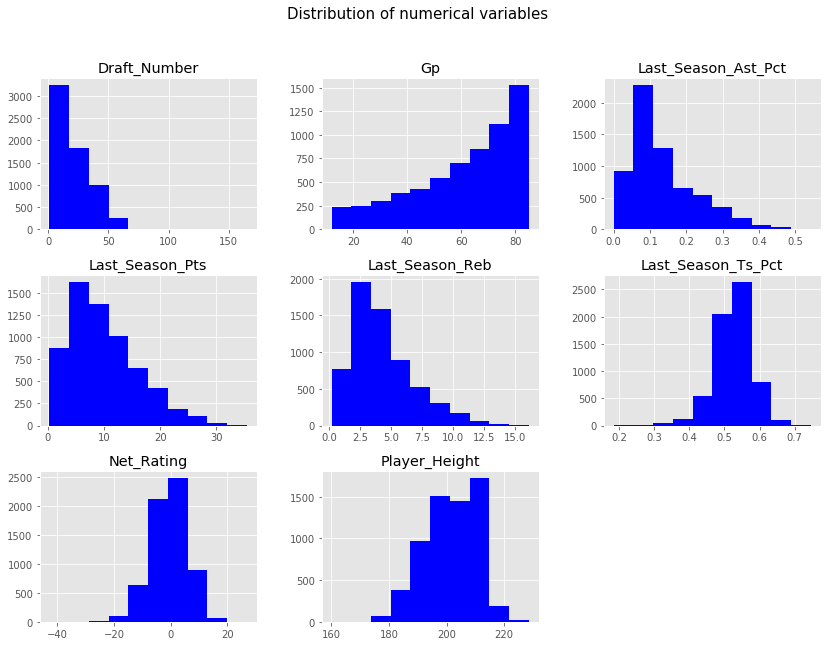

In [153]:
# Distribution of numerical variables - Each row contains statistics of a player's season's performance.

features1 = ['Net_Rating','Player_Height','Draft_Number','Last_Season_Pts','Gp'
             ,'Last_Season_Reb','Last_Season_Ts_Pct','Last_Season_Ast_Pct']
NBA_new[features1].hist(color='b',figsize=(14, 10))

plt.suptitle("Distribution of numerical variables",size=15)

'\nThere is a strong correlation between Player_Height and Player_Weight that implies multiculination.\nTherefore, one of them should be removed. It is also true of Age and Seniority.\nThere is, of course, a strong correlation between factors like assist percents and assist percentages.\n'

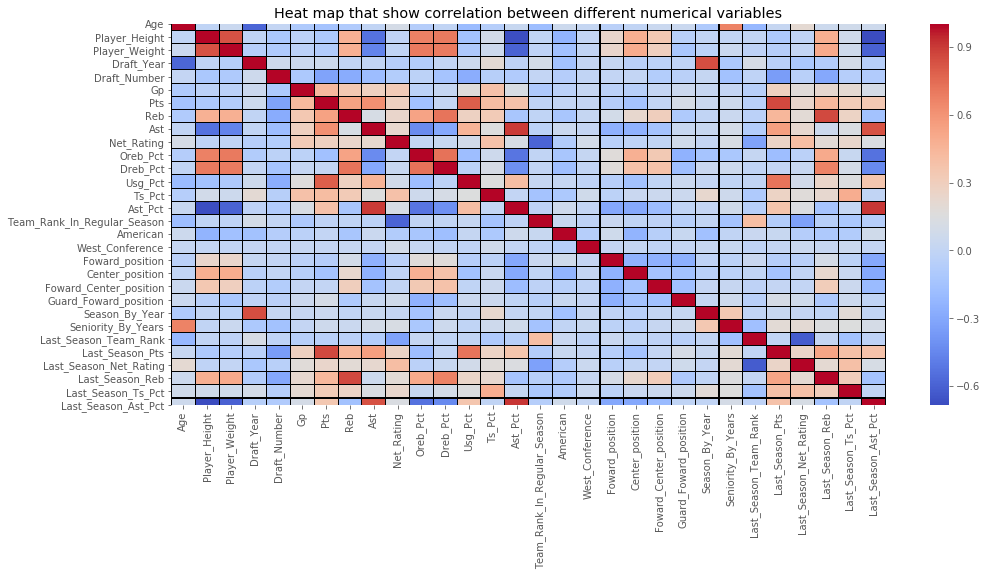

In [154]:
'''
By generating a heatmap that shows the correlation between different numerical variables, a strong positive
correlation is represented by a red color and a negative correlation is represented by a blue color.
'''

plt.figure(figsize=(16,7))
plt.title('Heat map that show correlation between different numerical variables')


sns.heatmap(NBA_new.corr(),cmap='coolwarm',linecolor='black',linewidth=0.05)

'''
There is a strong correlation between Player_Height and Player_Weight that implies multiculination.
Therefore, one of them should be removed. It is also true of Age and Seniority.
There is, of course, a strong correlation between factors like assist percents and assist percentages.
'''

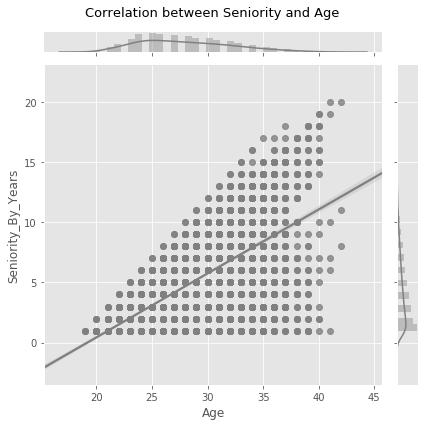

In [155]:
# There is a very high correlation between Seniority and Age, so it is necessary to remove one of them due to multicollinearity.
# Since Seniority impacts Net Rating of a player more clearly, I will remove Age.

p = sns.jointplot(x='Age',y='Seniority_By_Years',data=NBA_new,kind='regg',color='grey',
              height=6, ratio=10)

p.fig.suptitle("Correlation between Seniority and Age",size=13)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.92) # Reduce plot to make room 

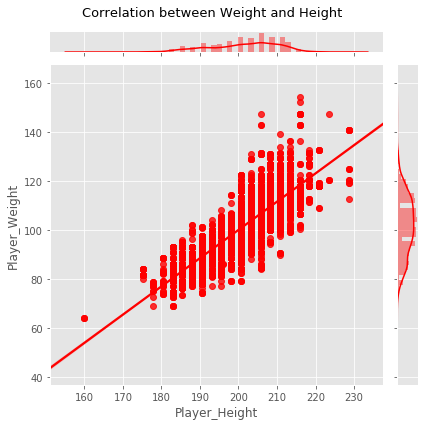

In [156]:
'''
There is a very high correlation between player's height and weight and age, therefore, one needs to be removed.
due to Multicollinearity.
Because weight is not as important as height to a basketball player, I will drop weight.
'''

d = sns.jointplot(x='Player_Height',y='Player_Weight',data=NBA_new,kind='regg',color='r',
              height=6, ratio=10)

d.fig.suptitle("Correlation between Weight and Height",size=13)
d.fig.tight_layout()
d.fig.subplots_adjust(top=0.92) # Reduce plot to make room 

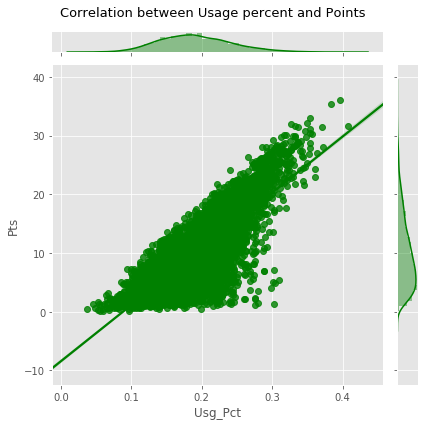

In [157]:
'''Very high correlation between Player's points and player's usage percent,therefore, need to remove one of them
due to Multicollinearity.
I will remove from the model the player's usage percent.
'''

c = sns.jointplot(x='Usg_Pct',y='Pts',data=NBA_new,kind='regg',color='g',
              height=6, ratio=10)

c.fig.suptitle("Correlation between Usage percent and Points",size=13)
c.fig.tight_layout()
c.fig.subplots_adjust(top=0.92) # Reduce plot to make room 

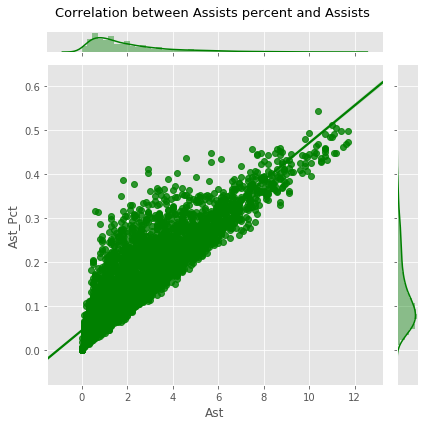

In [158]:
'''Obviously there is a very high correlation between Player's assists and player's assits percent,therefore, need to remove one of them
due to Multicollinearity.
The same is relevant for Rebounds and Rebounds percent.
In the model I will use Rebounds and assists perecent because it reflects better the player's contribute to the team.
'''

b = sns.jointplot(x='Ast',y='Ast_Pct',data=NBA_new,kind='regg',color='g',
              height=6, ratio=10)

b.fig.suptitle("Correlation between Assists percent and Assists",size=13)
b.fig.tight_layout()
b.fig.subplots_adjust(top=0.92) # Reduce plot to make room 

In [159]:
print('Columns:')
print('-'*128)

for column in NBA_new:
    print(column, end=' | ')

Columns:
--------------------------------------------------------------------------------------------------------------------------------
Age | Player_Height | Player_Weight | College | Country | Draft_Year | Draft_Number | Gp | Pts | Reb | Ast | Net_Rating | Oreb_Pct | Dreb_Pct | Usg_Pct | Ts_Pct | Ast_Pct | Season | Conference | Team_Rank_In_Regular_Season | Position | American | West_Conference | Foward_position | Center_position | Foward_Center_position | Guard_Foward_position | Season_By_Year | Seniority_By_Years | Last_Season_Team_Rank | Last_Season_Pts | Last_Season_Net_Rating | Last_Season_Reb | Last_Season_Ts_Pct | Last_Season_Ast_Pct | 

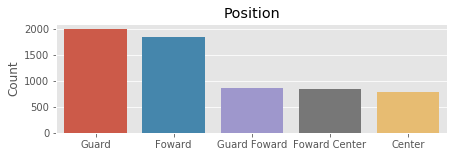

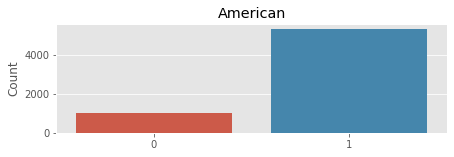

In [160]:
# Distribution of players by position and nationality, based on number of seasons played.

NBA_new_cat = ['Position','American']

for i in NBA_new_cat:
    plt.figure(figsize=(7,2))
    sns.barplot (NBA_new[i].value_counts().index, NBA_new[i].value_counts()).set_title(i)
    plt.ylabel("Count")
    plt.show()

Text(0.5, 1.0, "Player's net rating by position as well as American vs. international")

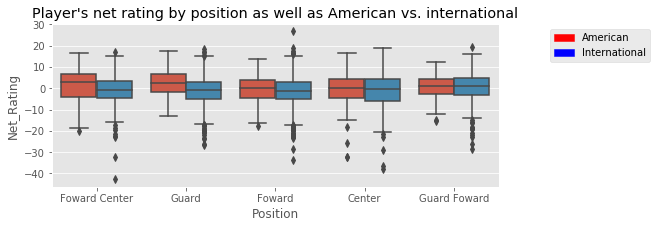

In [161]:
# Player's net rating by position as well as American vs. international.

plt.figure(figsize=(8,3))

sns.boxplot(x='Position',y='Net_Rating',data=NBA_new,hue='American')

red_patch = mpatches.Patch(color='red', label='American')

blue_patch= mpatches.Patch(color='blue', label='International')
plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.35,1),loc='upper right')
plt.title("Player's net rating by position as well as American vs. international")

In [162]:
# Remove age, weight,offensive rebounds percent, defensive rebound percetnt, and assists columns to avoid multicollinearity.

NBA_new.drop(columns=['Age','Player_Weight','Ast','Oreb_Pct','Dreb_Pct'],axis=1,inplace=True)
NBA_new.head()

,Player_Height,College,Country,Draft_Year,Draft_Number,Gp,Pts,Reb,Net_Rating,Usg_Pct,...,Foward_Center_position,Guard_Foward_position,Season_By_Year,Seniority_By_Years,Last_Season_Team_Rank,Last_Season_Pts,Last_Season_Net_Rating,Last_Season_Reb,Last_Season_Ts_Pct,Last_Season_Ast_Pct
146,205.74,Oregon State,USA,1985,23,82,7.3,8.1,-7.2,0.118,...,1,0,1997,1,11.0,7.2,-8.0,7.9,0.523,0.045
147,205.74,Oregon State,USA,1985,23,50,4.9,4.6,-5.6,0.148,...,1,0,1998,2,10.0,7.3,-7.2,8.1,0.496,0.074
148,205.74,Oregon State,USA,1985,23,82,5.0,5.9,8.1,0.111,...,1,0,1999,3,11.0,4.9,-5.6,4.6,0.441,0.043
149,205.74,Oregon State,USA,1985,23,82,4.5,3.8,3.3,0.141,...,1,0,2000,4,1.0,5.0,8.1,5.9,0.482,0.058
3017,185.42,Indiana,USA,2000,32,45,5.4,1.0,-3.8,0.221,...,0,0,2001,1,15.0,6.0,-12.4,1.1,0.495,0.198


In [163]:
from warnings import filterwarnings
import scipy.stats as stat     

In [164]:
# Adding Draft_Number_Scale column.

NBA_new['Draft_Number_Scale'] = None
NBA_new.loc[(NBA_new['Draft_Number'] < 6.) &(NBA_new['Draft_Number'] != 0.),'Draft_Number_Scale'] = '1-5'
NBA_new.loc[(NBA_new['Draft_Number'] >=6.) &(NBA_new['Draft_Number'] < 16.),'Draft_Number_Scale'] = '6-15'
NBA_new.loc[(NBA_new['Draft_Number'] >=16.) &(NBA_new['Draft_Number'] < 31.),'Draft_Number_Scale'] = '16-30'
NBA_new.loc[(NBA_new['Draft_Number'] >=31.),'Draft_Number_Scale'] = '31+'

# Adding Seniority_By_Years_Scale column.

NBA_new['Seniority_By_Years_Scale'] = None
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=0.) &(NBA_new['Seniority_By_Years'] < 2.),'Seniority_By_Years_Scale'] = '0-1'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=2.) &(NBA_new['Seniority_By_Years'] < 4.),'Seniority_By_Years_Scale'] = '2-3'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=4.) &(NBA_new['Seniority_By_Years'] < 7.),'Seniority_By_Years_Scale'] = '4-6'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=7.) &(NBA_new['Seniority_By_Years'] < 10.),'Seniority_By_Years_Scale'] = '7-9'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=10.) &(NBA_new['Seniority_By_Years'] < 13.),'Seniority_By_Years_Scale'] = '10-12'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=13.) &(NBA_new['Seniority_By_Years'] < 16.),'Seniority_By_Years_Scale'] = '13-15'
NBA_new.loc[(NBA_new['Seniority_By_Years'] >=16.),'Seniority_By_Years_Scale'] = '16+'

# Adding Team_Rank_Scale column.

NBA_new['Team_Rank_Scale'] = None
NBA_new.loc[(NBA_new['Team_Rank_In_Regular_Season'] >=0.) &(NBA_new['Team_Rank_In_Regular_Season'] < 4.),'Team_Rank_Scale'] = '1-3'
NBA_new.loc[(NBA_new['Team_Rank_In_Regular_Season'] >=4.) &(NBA_new['Team_Rank_In_Regular_Season'] < 7.),'Team_Rank_Scale'] = '4-6'
NBA_new.loc[(NBA_new['Team_Rank_In_Regular_Season'] >=7.) &(NBA_new['Team_Rank_In_Regular_Season'] < 10.),'Team_Rank_Scale'] = '7-9'
NBA_new.loc[(NBA_new['Team_Rank_In_Regular_Season'] >=10.) &(NBA_new['Team_Rank_In_Regular_Season'] < 13.),'Team_Rank_Scale'] = '10-12'
NBA_new.loc[(NBA_new['Team_Rank_In_Regular_Season'] >=13.),'Team_Rank_Scale'] = '13+'

# Data Explanation

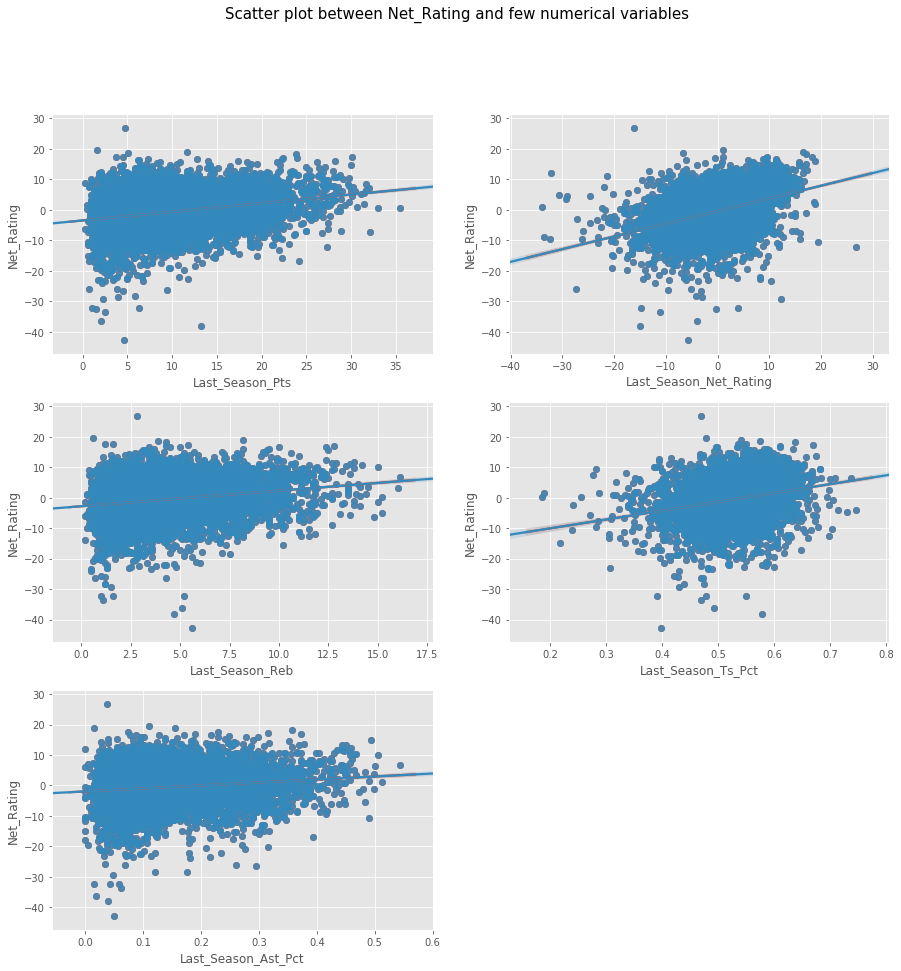

In [165]:
'''
The scatter plots below compare the Net Rating to the numerical columns that represent performance from last year,
in order to understand the correlations.
'''

last_year_numerical_variables = ['Last_Season_Pts','Last_Season_Net_Rating','Last_Season_Reb',
             'Last_Season_Ts_Pct','Last_Season_Ast_Pct']

count=1
plt.subplots(figsize=(15, 15))

for column in last_year_numerical_variables:
    plt.subplot(3,2,count)
    sns.regplot(NBA_new[column],NBA_new['Net_Rating'])
    sns.regplot(NBA_new[column],NBA_new['Net_Rating'])
    count+=1

plt.suptitle('Scatter plot between Net_Rating and few numerical variables',size=15)
plt.show()

In [166]:
NBA_new.head()

,Player_Height,College,Country,Draft_Year,Draft_Number,Gp,Pts,Reb,Net_Rating,Usg_Pct,...,Seniority_By_Years,Last_Season_Team_Rank,Last_Season_Pts,Last_Season_Net_Rating,Last_Season_Reb,Last_Season_Ts_Pct,Last_Season_Ast_Pct,Draft_Number_Scale,Seniority_By_Years_Scale,Team_Rank_Scale
146,205.74,Oregon State,USA,1985,23,82,7.3,8.1,-7.2,0.118,...,1,11.0,7.2,-8.0,7.9,0.523,0.045,16-30,0-1,10-12
147,205.74,Oregon State,USA,1985,23,50,4.9,4.6,-5.6,0.148,...,2,10.0,7.3,-7.2,8.1,0.496,0.074,16-30,2-3,10-12
148,205.74,Oregon State,USA,1985,23,82,5.0,5.9,8.1,0.111,...,3,11.0,4.9,-5.6,4.6,0.441,0.043,16-30,2-3,1-3
149,205.74,Oregon State,USA,1985,23,82,4.5,3.8,3.3,0.141,...,4,1.0,5.0,8.1,5.9,0.482,0.058,16-30,4-6,1-3
3017,185.42,Indiana,USA,2000,32,45,5.4,1.0,-3.8,0.221,...,1,15.0,6.0,-12.4,1.1,0.495,0.198,31+,0-1,13+


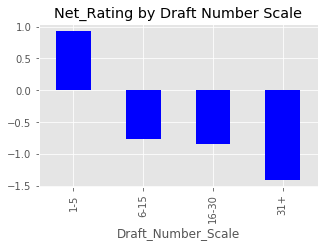

In [167]:
plt.figure(figsize=(5,3))

x1 = NBA_new.groupby('Draft_Number_Scale').Net_Rating.mean()
x1 = x1['1-5 6-15 16-30 31+'.split()]
x1.plot(kind='bar', color="b", title = "Net_Rating by Draft Number Scale")

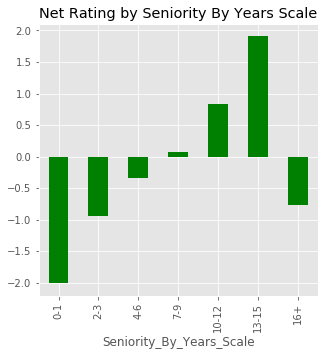

In [168]:
plt.figure(figsize=(5,5))

y5 = NBA_new.groupby("Seniority_By_Years_Scale").Net_Rating.mean()
y5 = y5['0-1 2-3 4-6 7-9 10-12 13-15 16+'.split()]
y5.plot(kind='bar', color="g", title = "Net Rating by Seniority By Years Scale");

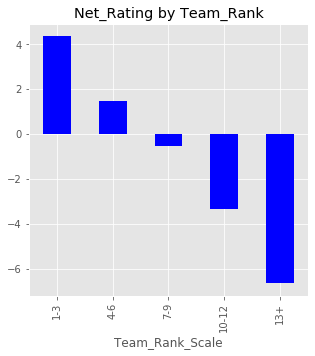

In [169]:
plt.figure(figsize=(5,5))

y8 = NBA_new.groupby('Team_Rank_Scale').Net_Rating.mean()
y8 = y8['1-3 4-6 7-9 10-12 13+'.split()]
y8.plot(kind='bar', color="b", title = "Net_Rating by Team_Rank")

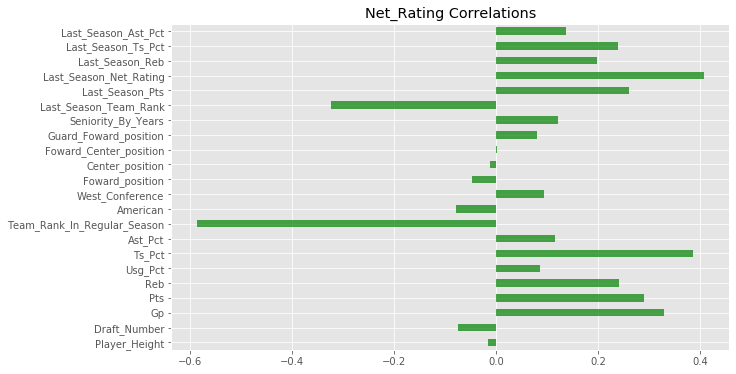

In [170]:
plt.figure(figsize=(10,6))

NBA_new.corr()['Net_Rating'].drop(['Net_Rating','Season_By_Year','Draft_Year']).plot(kind='barh',color="green",title = "Net_Rating Correlations",alpha=0.7)

# Data Preprocessing For Model

The purpose of the model is taking a given player and based on several given factors predict his Net Rating or 
evaluate his sucess in the end of the season based on the given factors.
Points, Rebounds and True percent shooting are mesaures which depends on the player and influence the Net Rating of
a player and the team has less effect on it, not like Usage percent.
Team Ranking will allow understand if the player performed good or not.

In [171]:
# Modifying the table so it could be used for the multiple linear regression model.

NBA_new.drop(columns=['Country','College','Gp','Usg_Pct','Pts','Ts_Pct','Ast_Pct','Draft_Year',
                      'Season','Conference','Position','Draft_Number_Scale','Seniority_By_Years_Scale','Team_Rank_Scale'
                      ,'Season_By_Year'],axis=1,inplace=True)

In [172]:
print('Columns for the model:')
print('-'*127)

NBA_new.columns

for column in NBA_new:
    print(column,end='  |  ')

Columns for the model:
-------------------------------------------------------------------------------------------------------------------------------
Player_Height  |  Draft_Number  |  Reb  |  Net_Rating  |  Team_Rank_In_Regular_Season  |  American  |  West_Conference  |  Foward_position  |  Center_position  |  Foward_Center_position  |  Guard_Foward_position  |  Seniority_By_Years  |  Last_Season_Team_Rank  |  Last_Season_Pts  |  Last_Season_Net_Rating  |  Last_Season_Reb  |  Last_Season_Ts_Pct  |  Last_Season_Ast_Pct  |  

In [173]:
# Columns which represent percent values are converted to percents.

NBA_new['Last_Season_Reb'] = NBA_new['Last_Season_Reb']*100
NBA_new['Last_Season_Ts_Pct'] = NBA_new['Last_Season_Ts_Pct']*100
NBA_new['Last_Season_Ast_Pct'] = NBA_new['Last_Season_Ast_Pct']*100

In [174]:
# The following column's data type will be changed to float.

NBA_new['Last_Season_Team_Rank'] = NBA_new['Last_Season_Team_Rank'].astype(float)
NBA_new['Last_Season_Pts'] = NBA_new['Last_Season_Pts'].astype(float)
NBA_new['Last_Season_Net_Rating'] = NBA_new['Last_Season_Net_Rating'].astype(float)
NBA_new['Last_Season_Reb'] = NBA_new['Last_Season_Reb'].astype(float)
NBA_new['Last_Season_Ts_Pct'] = NBA_new['Last_Season_Ts_Pct'].astype(float)
NBA_new['Last_Season_Ast_Pct'] = NBA_new['Last_Season_Ast_Pct'].astype(float)

NBA_new.head()

,Player_Height,Draft_Number,Reb,Net_Rating,Team_Rank_In_Regular_Season,American,West_Conference,Foward_position,Center_position,Foward_Center_position,Guard_Foward_position,Seniority_By_Years,Last_Season_Team_Rank,Last_Season_Pts,Last_Season_Net_Rating,Last_Season_Reb,Last_Season_Ts_Pct,Last_Season_Ast_Pct
146,205.74,23,8.1,-7.2,10,1,1,0,0,1,0,1,11.0,7.2,-8.0,790.0,52.3,4.5
147,205.74,23,4.6,-5.6,11,1,1,0,0,1,0,2,10.0,7.3,-7.2,810.0,49.6,7.4
148,205.74,23,5.9,8.1,1,1,1,0,0,1,0,3,11.0,4.9,-5.6,460.0,44.1,4.3
149,205.74,23,3.8,3.3,3,1,0,0,0,1,0,4,1.0,5.0,8.1,590.0,48.2,5.8
3017,185.42,32,1.0,-3.8,15,1,0,0,0,0,0,1,15.0,6.0,-12.4,110.0,49.5,19.8


In [175]:
# Importing relevant libraries to conduct and evaluate the multiple linear regression analysis.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [176]:
independent_variables = NBA_new.columns.tolist()
independent_variables

['Player_Height',
 'Draft_Number',
 'Reb',
 'Net_Rating',
 'Team_Rank_In_Regular_Season',
 'American',
 'West_Conference',
 'Foward_position',
 'Center_position',
 'Foward_Center_position',
 'Guard_Foward_position',
 'Seniority_By_Years',
 'Last_Season_Team_Rank',
 'Last_Season_Pts',
 'Last_Season_Net_Rating',
 'Last_Season_Reb',
 'Last_Season_Ts_Pct',
 'Last_Season_Ast_Pct']

In [177]:
dependent_variable = 'Net_Rating'

In [178]:
independent_variables.remove(dependent_variable)

In [179]:
independent_variables

['Player_Height',
 'Draft_Number',
 'Reb',
 'Team_Rank_In_Regular_Season',
 'American',
 'West_Conference',
 'Foward_position',
 'Center_position',
 'Foward_Center_position',
 'Guard_Foward_position',
 'Seniority_By_Years',
 'Last_Season_Team_Rank',
 'Last_Season_Pts',
 'Last_Season_Net_Rating',
 'Last_Season_Reb',
 'Last_Season_Ts_Pct',
 'Last_Season_Ast_Pct']

In [180]:
# Create the data of indepedent variables

X = NBA_new[independent_variables].values

# Create the depedent variable data

y = NBA_new[dependent_variable].values

X[0:5]

array([[205.74,  23.  ,   8.1 ,  10.  ,   1.  ,   1.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   1.  ,  11.  ,   7.2 ,  -8.  , 790.  ,  52.3 ,
          4.5 ],
       [205.74,  23.  ,   4.6 ,  11.  ,   1.  ,   1.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   2.  ,  10.  ,   7.3 ,  -7.2 , 810.  ,  49.6 ,
          7.4 ],
       [205.74,  23.  ,   5.9 ,   1.  ,   1.  ,   1.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   3.  ,  11.  ,   4.9 ,  -5.6 , 460.  ,  44.1 ,
          4.3 ],
       [205.74,  23.  ,   3.8 ,   3.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   4.  ,   1.  ,   5.  ,   8.1 , 590.  ,  48.2 ,
          5.8 ],
       [185.42,  32.  ,   1.  ,  15.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   1.  ,  15.  ,   6.  , -12.4 , 110.  ,  49.5 ,
         19.8 ]])

# Model Building

In [181]:
# Splitting the data set into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=0)

In [182]:
# Transforming the data.

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
# Checking that the values are between 0 and 1.

X_train[0:10]

array([[0.37037037, 0.05487805, 0.1835443 , 0.5       , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10526316, 0.57142857, 0.59119497, 0.52138158, 0.20125786,
        0.60366972, 0.48618785],
       [0.48148148, 0.18902439, 0.0443038 , 0.07142857, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05660377, 0.48519737, 0.01886792,
        0.39633028, 0.45119705],
       [0.55555556, 0.26219512, 0.21518987, 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71428571, 0.11949686, 0.51315789, 0.10691824,
        0.63669725, 0.18047882],
       [0.62962963, 0.02439024, 0.10126582, 0.07142857, 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.68421053, 0.42857143, 0.21383648, 0.51809211, 0.14465409,
        0.79633028, 0.21362799],
       [0.40740741, 0.1402439 , 0.05696203, 0.857142

In [184]:
# Fitting multiple linear regression to the training data.

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [185]:
# A linear regression of the training set is used to predict results of the test set.

y_predict = regressor.predict(X_test)

In [186]:
# Guard position is represented by alpha value.

print('The intercept for our model is: ',regressor.intercept_)
print('Which means that this is going to be the Net Rating value if all the variables were equal to zero')

The intercept for our model is:  -4.275129989370616
Which means that this is going to be the Net Rating value if all the variables were equal to zero


In [187]:
cdf = pd.DataFrame(data = regressor.coef_, index = independent_variables, columns=['Coeff'])
cdf

,Coeff
Player_Height,-1.775885
Draft_Number,0.431401
Reb,15.468460
Team_Rank_In_Regular_Season,-11.663619
American,-0.675598
West_Conference,0.875444
Foward_position,-0.301949
Center_position,-1.012050
Foward_Center_position,-1.196861
Guard_Foward_position,0.437960


# Model Evaluation

In [188]:
'''
RSME - Residual Squared Mean Error is used to evaluate the model by understanding the average distance between
the real Net Rating and the predicted one.
'''

print('The average distance between the actual and predicted Net Rating is about: ',m.sqrt(mean_squared_error(y_test,y_predict)))

The average distance between the actual and predicted Net Rating is about:  4.674696742559557


In [189]:
print('The R-Squared value is: ',r2_score(y_test,y_predict)*100,'%',' which means that',r2_score(y_test,y_predict)*100,'%','of the Net Rating is explained by the model')

The R-Squared value is:  45.64190800377561 %  which means that 45.64190800377561 % of the Net Rating is explained by the model


In [190]:
import statsmodels.api as sm

In [191]:
# Define our input

X2= sms.add_constant(X)

# Create an OLS model

model_1 = sm.OLS(y,X2)

# Fit the data

est= model_1.fit()

In [192]:
'''
The summary of model performance shows that the P-values of variables x1,x2,x7,x10,x11,x12 are higher than 0.05, so they
are insignificant in 95% confidence interval
'''

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     331.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:53:11   Log-Likelihood:                -18799.
No. Observations:                6318   AIC:                         3.763e+04
Df Residuals:                    6300   BIC:                         3.776e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8659      3.253      1.189      0.2

# Model Improving

Text(0.5, 1.0, 'Net Rating by Seniority')

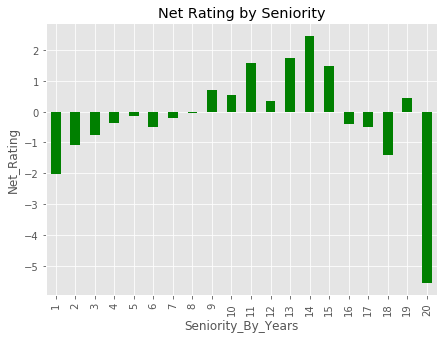

In [193]:
# Clearly the model has outliers because of players who have seniority of 20 and 21 years.

plt.figure(figsize=(7,5))

NBA_new.groupby('Seniority_By_Years')['Net_Rating'].mean().plot(kind='bar',color='g')
plt.ylabel('Net_Rating')
plt.title('Net Rating by Seniority')

In [194]:
'''
Dropping player's season for players with seniority over 14 years because there is a decline in their Net Rating
since it and I am going to ues a linear regression model and not polynomial regression.
'''

NBA_new.drop(NBA_new.loc[NBA_new['Seniority_By_Years']>14].index, inplace=True)

NBA_new['Seniority_By_Years'].max()

14

In [195]:
# Creating a list of the significant variables in 95% confidence interval

sig_var = [
       'Team_Rank_In_Regular_Season', 'American', 'West_Conference',
       'Foward_position', 'Center_position', 'Foward_Center_position',
       'Guard_Foward_position', 'Seniority_By_Years', 
       'Last_Season_Pts', 'Last_Season_Net_Rating', 'Last_Season_Reb',
       'Last_Season_Ts_Pct', 'Last_Season_Ast_Pct']

print('Significant variables:')
print('-'*50)

for column in sig_var:
    print(column,end=' | ')

Significant variables:
--------------------------------------------------
Team_Rank_In_Regular_Season | American | West_Conference | Foward_position | Center_position | Foward_Center_position | Guard_Foward_position | Seniority_By_Years | Last_Season_Pts | Last_Season_Net_Rating | Last_Season_Reb | Last_Season_Ts_Pct | Last_Season_Ast_Pct | 

In [196]:
# Create the data of indepedent variables.

x = NBA_new[sig_var].values

# Create the depedent variable data.

Y = NBA_new[dependent_variable].values

x

array([[ 10. ,   1. ,   1. , ..., 790. ,  52.3,   4.5],
       [ 11. ,   1. ,   1. , ..., 810. ,  49.6,   7.4],
       [  1. ,   1. ,   1. , ..., 460. ,  44.1,   4.3],
       ...,
       [  1. ,   0. ,   0. , ..., 930. ,  52.2,   8.2],
       [  1. ,   0. ,   0. , ..., 750. ,  52.3,   6. ],
       [  2. ,   0. ,   0. , ..., 540. ,  49.1,   5.8]])

In [197]:
# Splitting the data set into the training set and test set

x_train, x_test, Y_train, Y_test = train_test_split(x, Y ,test_size=0.3,random_state=0)

# Transforming data

scaler1=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [198]:
regressor1 = LinearRegression()
regressor1.fit(x_train,Y_train)

LinearRegression()

In [199]:
cdf1 = pd.DataFrame(data = regressor1.coef_, index = sig_var, columns=['Coeff'])
cdf1.index.name = 'Variable'

cdf1

,Coeff
Variable,
Team_Rank_In_Regular_Season,-11.169866
American,-0.816344
West_Conference,0.755219
Foward_position,-0.544223
Center_position,-1.118271
Foward_Center_position,-0.944191
Guard_Foward_position,0.526811
Seniority_By_Years,-0.931598
Last_Season_Pts,2.826736


# Model Evaluation

In [200]:
# Define the input

X3= sms.add_constant(x)

# Create an OLS model

model_2 = sm.OLS(Y,X3)

# Fit the data

est1= model_2.fit()

In [201]:
'''
The summary of model performance shows that P-values for variables x4, and x5 are greater than 0.05, so they are not
significant in 95% confidence interval
'''

print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     375.9
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:53:12   Log-Likelihood:                -18750.
No. Observations:                6238   AIC:                         3.753e+04
Df Residuals:                    6224   BIC:                         3.762e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3477      0.770      0.451      0.6

In [202]:
sig_var2 = [
       'Team_Rank_In_Regular_Season', 'American', 'West_Conference', 'Foward_Center_position',
       'Guard_Foward_position', 'Seniority_By_Years', 
       'Last_Season_Pts', 'Last_Season_Net_Rating', 'Last_Season_Reb',
       'Last_Season_Ts_Pct', 'Last_Season_Ast_Pct']

print('Updated significant variables:')
print('-'*50)

for column in sig_var2:
    print(column,end=' | ')

Updated significant variables:
--------------------------------------------------
Team_Rank_In_Regular_Season | American | West_Conference | Foward_Center_position | Guard_Foward_position | Seniority_By_Years | Last_Season_Pts | Last_Season_Net_Rating | Last_Season_Reb | Last_Season_Ts_Pct | Last_Season_Ast_Pct | 

In [203]:
# Create the data of indepedent variables

x2 = NBA_new[sig_var2].values

# Create the depedent variable data

Y2 = NBA_new[dependent_variable].values

x2

array([[ 10. ,   1. ,   1. , ..., 790. ,  52.3,   4.5],
       [ 11. ,   1. ,   1. , ..., 810. ,  49.6,   7.4],
       [  1. ,   1. ,   1. , ..., 460. ,  44.1,   4.3],
       ...,
       [  1. ,   0. ,   0. , ..., 930. ,  52.2,   8.2],
       [  1. ,   0. ,   0. , ..., 750. ,  52.3,   6. ],
       [  2. ,   0. ,   0. , ..., 540. ,  49.1,   5.8]])

In [204]:
# Splitting the data set into the training set and test set

x2_train, x2_test, Y2_train, Y2_test = train_test_split(x2, Y2 ,test_size=0.2,random_state=0)

# Transforming data

scaler2=MinMaxScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

In [205]:
regressor2 = LinearRegression()
regressor2.fit(x2_train,Y2_train)

LinearRegression()

In [206]:
# Define the input

X4= sms.add_constant(x2)

# Create an OLS model

model_4 = sm.OLS(Y2,X4)

# Fit the data

est4= model_4.fit()

In [207]:
# Guard position is represented by alpha value.

print('The intercept for our model is: ',regressor2.intercept_)
print('Which means that this is going to be the Net Rating value if all the variables were equal to zero')

The intercept for our model is:  -4.917111487818049
Which means that this is going to be the Net Rating value if all the variables were equal to zero


In [208]:
cdf2 = pd.DataFrame(data = regressor2.coef_, index = sig_var2, columns=['Coeff'])

cdf2.index.name = 'Variable'

cdf2

,Coeff
Variable,
Team_Rank_In_Regular_Season,-11.110677
American,-0.727037
West_Conference,0.846993
Foward_Center_position,-0.287466
Guard_Foward_position,0.876003
Seniority_By_Years,-0.956805
Last_Season_Pts,3.172076
Last_Season_Net_Rating,9.487864
Last_Season_Reb,3.595183


In [209]:
est4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     443.8
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:53:12   Log-Likelihood:                -18752.
No. Observations:                6238   AIC:                         3.753e+04
Df Residuals:                    6226   BIC:                         3.761e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0923      0.743      0.124      0.901      -1.364       1.549
x1            -0.7807      0.015    -50.457      0.000      -0.811      -0.750
x2            -0.7923      0.173     -4.583      0.000      -1.131      -0.453
x3             0.8689      0.124      6.986      0.000       0.625       1.113
x4            -0.4493      0.198     -2.272      0.023      -0.837      -0.062
x5             0.7190      0.190      3.791      0.000       0.347       1.091
x6            -0.0743      0.021     -3.606      0.000      -0.115      -0.034
x7             0.0976      0.016      6.128      0.000       0.066       0.129
x8             0.1728      0.011     15.332      0.000       0.151       0.195
x9             0.0024      0.000      6.790      0.000       0.002       0.003
x10            0.0610      0.014      4.493      0.000       0.034       0.088
x11            0.0497      0.009      5.845      0.000       0.033       0.066
==============================================================================
Omnibus:                     1447.499   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7240.649
Skew:                          -1.028   Prob(JB):                         0.00
Kurtosis:                       7.861   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
Y_predict=regressor2.predict(x2_test)

In [211]:
'''
Using RSME - Residual Squared Mean Error method to evaluate the model by undestand the average distance between the
real Net Rating to the predicted one 
'''

print('The average distance from the actual Net Rating is about: ',m.sqrt(mean_squared_error(Y2_test,Y_predict)))

The average distance from the actual Net Rating is about:  4.878346846266868


In [212]:
# Checking the Net Rating std which is about 6.5, therefore a RSME of 4.7 is acceptable.

print('Net Rating std: ',NBA_new['Net_Rating'].describe()['std'])

Net Rating std:  6.532045895963568


In [213]:
print(' About',r2_score(Y2_test,Y_predict)*100,'%','of the Net Rating value is explained by the model')

 About 42.32905421694324 % of the Net Rating value is explained by the model


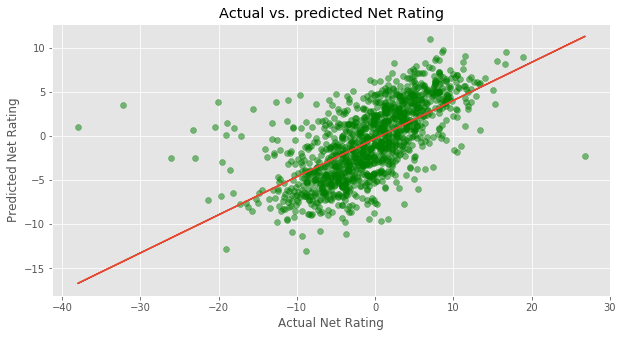

In [214]:
predictions = regressor2.predict(x2_test)

plt.figure(figsize=(10,5))

plt.scatter(Y2_test,predictions,color='g',alpha=0.5)
plt.title('Actual vs. predicted Net Rating')
plt.xlabel('Actual Net Rating')
plt.ylabel('Predicted Net Rating')
m, b = np.polyfit(Y2_test, predictions, 1)
plt.plot(Y2_test, m*Y2_test+b)

Text(0.5, 0, 'Difference')

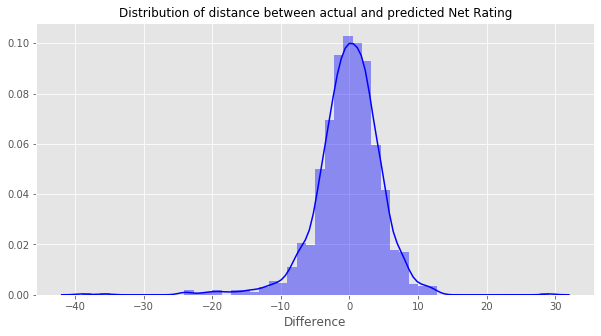

In [215]:
# Checking that the distribution is normal.

plt.figure(figsize=(10,5))

sns.distplot(Y2_test-predictions,color='b')
plt.title('Distribution of distance between actual and predicted Net Rating',size=12)
plt.xlabel('Difference')